# **Step 1: Project Initialization**

# Bank Marketing Campaign Analysis Project
### By: Marjan Rafiee
### Date: November 2024

## **Describe Project (Bank Marketing)**
 **Briefly describe the project :**
The primary objective of this project is to analyze the effectiveness of direct marketing campaigns of a Portuguese banking institution and predict whether a client will subscribe to a term deposit. The analysis aims to improve the bank's marketing strategies and increase the subscription rate for term deposits.

 **Methods:**
The project uses a dataset that contains information about the bank’s marketing campaigns, which were based on phone calls. The data spans from May 2008 to November 2010 and includes various attributes related to the clients, their demographics, previous interactions, and the outcome of the campaigns. Data preprocessing steps included handling missing values, outliers, and transforming variables as necessary. Several machine learning models, including Logistic Regression, Decision Trees, and Random Forests, were employed to predict the likelihood of a client subscribing to a term deposit. Model performance was evaluated using metrics such as accuracy, precision, recall, F1-score, and AUC.

 **Results:**
The analysis revealed significant patterns and relationships between client attributes and their likelihood of subscribing to a term deposit, while addressing the inherent class imbalance in the dataset. After applying balancing techniques to ensure robust model training, the Tuned Voting Classifier emerged as the best performing model with an accuracy of 95.19%, precision of 94.87%, recall of 95.19%, and an ROC AUC of 0.9298. The balanced dataset allowed for more reliable feature importance analysis, which identified the day of contact (0.027), month of contact (particularly April at 0.020), call duration (0.018), and housing status (0.015) as the most influential factors in predicting subscription likelihood.

 **Conclusion:**
 The project successfully demonstrated the potential of ensemble learning techniques combined with data balancing methods in enhancing the bank's marketing strategies. By addressing the class imbalance issue, we ensured that the model's high performance metrics genuinely reflect its predictive capabilities across both majority and minority classes. The insights gained from the Tuned Voting Classifier suggest that campaign timing (both day and month) and call duration are crucial factors for success. The bank should particularly focus on optimizing contact scheduling and call management strategies. Housing status emerged as a key demographic indicator, while traditional factors like age and marital status showed relatively lower but still meaningful impact. Future work could include exploring additional data balancing techniques, incorporating more data sources, and further optimizing the ensemble methods to maintain robust performance across all customer segments.



## Identifying the features
**age:** The age of the client.

**job:** The type of job the client has (e.g., "management", "technician").

**marital:** Marital status of the client (e.g., "married", "single").

**education:** The educational qualification of the client (e.g., "tertiary", "secondary")

**default:** Whether the client has credit in default ("yes", "no")

**balance:** The client's average yearly balance in euros.

**housing:** Whether the client has a housing loan ("yes", "no").

**loan:** Whether the client has a personal loan ("yes", "no").

**contact:** The type of communication contact (e.g., "cellular", "telephone").

**day:** The last contact day of the month.

**month:** The last contact month of the year.

**duration:** Duration of the last contact in seconds.

**campaign:** Number of contacts performed during this campaign and for this client.

**pdays:** Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted).

**previous:** Number of contacts performed before this campaign and for this client.

**poutcome:** Outcome of the previous marketing campaign (e.g., "success", "failure").

**y:** Whether the client subscribed to a term deposit ("yes", "no").

This project aims to predict whether a client will subscribe to a term deposit based on a variety of attributes presented in the dataset. The dataset includes features such as age, job, marital status, education level, credit defaults, account balance, housing status, personal loans, type of contact, and details about previous marketing campaigns.

# **Step 2 : Project Impleament**


In this project, I analyze banking marketing campaign data to predict client subscription outcomes for term deposits. The implementation follows these structured steps:

**1- Establishing Connection in MySQL:** Creating MySQL connection interface,
Setting up database connectivity parameters

**2- Database and Table Creation:** Creating database structure,Designing table schema,Importing Excel data into MySQL through Python code
writing SQL file(*Create_database.sql*) within project folder


**3- Data Loading:** Establishing Python-MySQL connection,Loading data into Python environment, Initial data verification through Python code writing Notebook file(Marjanrafiee_bankmarketing_Capstone.ipynb)


**4- Data Cleaning:** Handling missing values, Removing duplicates,Data type corrections, Format standardization


**5- Data Analysis:** Exploratory Data Analysis (EDA),Statistical analysis, Distribution analysis, Correlation studies


**6- Feature Engineering:** Feature creation,Feature transformation
Encoding categorical variables,Feature scaling


**7- Model Development and Optimization:** Building base models,Hyperparameter tuning, Model evaluation, Performance comparison


**8- Ensemble Modeling:** Selecting best performing models,Implementing ensemble techniques (Voting, Stacking),Optimizing ensemble parameters,Comparing ensemble performances


**9- Final Model Selection:** Identifying the best performing model,Analyzing feature importance ,Model validation,Performance metrics evaluation


**10- Business Insights and Recommendations:** Extracting business insights, Developing actionable recommendations,Performance reporting,Future improvement suggestions

**11- Data Extraction for import power BI**


# **Step 3: Data Understanding and Prepration**

## 1. Connect to my Sql and load data set 

In [1]:
from sqlalchemy import create_engine , text  
import pandas as pd  
import numpy as np

# Database connection details
username = 'project'
password = '12345'
host = '127.0.0.1'
port = '3306'  # Default port for MySQL
database = 'Banking_project'
# Create a database connection
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# Connect to the database
with engine.connect() as connection:
    # Query to retrieve data
    query = text('SELECT * FROM  Banking')  
    
    # Execute the query and fetch the data
    result = connection.execute(query)
    
    # Load data into a pandas DataFrame
    bank_data = pd.DataFrame(result.fetchall(), columns=result.keys())


## **2. Initial data inspection**


In [2]:
# Display Information of dataset
bank_data.head()

,age,job,marital,education,default_status,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.00,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.00,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.00,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.00,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.00,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education       45211 non-null  object
 4   default_status  45211 non-null  object
 5   balance         45211 non-null  object
 6   housing         45211 non-null  object
 7   loan            45211 non-null  object
 8   contact         45211 non-null  object
 9   day             45211 non-null  int64 
 10  month           45211 non-null  object
 11  duration        45211 non-null  int64 
 12  campaign        45211 non-null  int64 
 13  pdays           45211 non-null  int64 
 14  previous        45211 non-null  int64 
 15  poutcome        45211 non-null  object
 16  y               45211 non-null  object
dtypes: int64(6), object(11)
memory usage: 5.9+ MB


## **3. Cleaning Dtata**

In [4]:
# Change data type
bank_data['balance'] = bank_data['balance'].astype(int)

In [5]:
# Drop duplicate rows
bank_data.drop_duplicates(inplace=True)

### Cleaning numeric columns

In [6]:
# summary data 
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Check for missing values in the integer columns
numerical_cols = bank_data.select_dtypes(include=['int', 'float']).columns.tolist()
print("Numerical Columns:")
print(numerical_cols)

missing_values = bank_data.isnull().sum()
# Display missing values count
missing_values

Numerical Columns:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


age               0
job               0
marital           0
education         0
default_status    0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [8]:
# Function to count negative values in the columns 
def count_negative_values(df, columns):
    negative_counts = {}
    for column in columns:
        negative_counts[column] = (df[column] < 0).sum()
    return negative_counts

negative_value_counts = count_negative_values(bank_data, numerical_cols)
negative_value_counts

{'age': 0,
 'balance': 3766,
 'day': 0,
 'duration': 0,
 'campaign': 0,
 'pdays': 36954,
 'previous': 0}

In [9]:
# Function to replace negative values with zero
def replace_negative_values(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: x if x >= 0 else 0)
    return df

# Apply the function to the dataframe for columns with negative values
columns_with_negatives = ['pdays']
df = replace_negative_values(bank_data, columns_with_negatives)

# Summary statistics after replacing negative values
summary_stats_after_replacement = df[columns_with_negatives].describe()
print(summary_stats_after_replacement)

              pdays
count  45211.000000
mean      41.015195
std       99.792615
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      871.000000


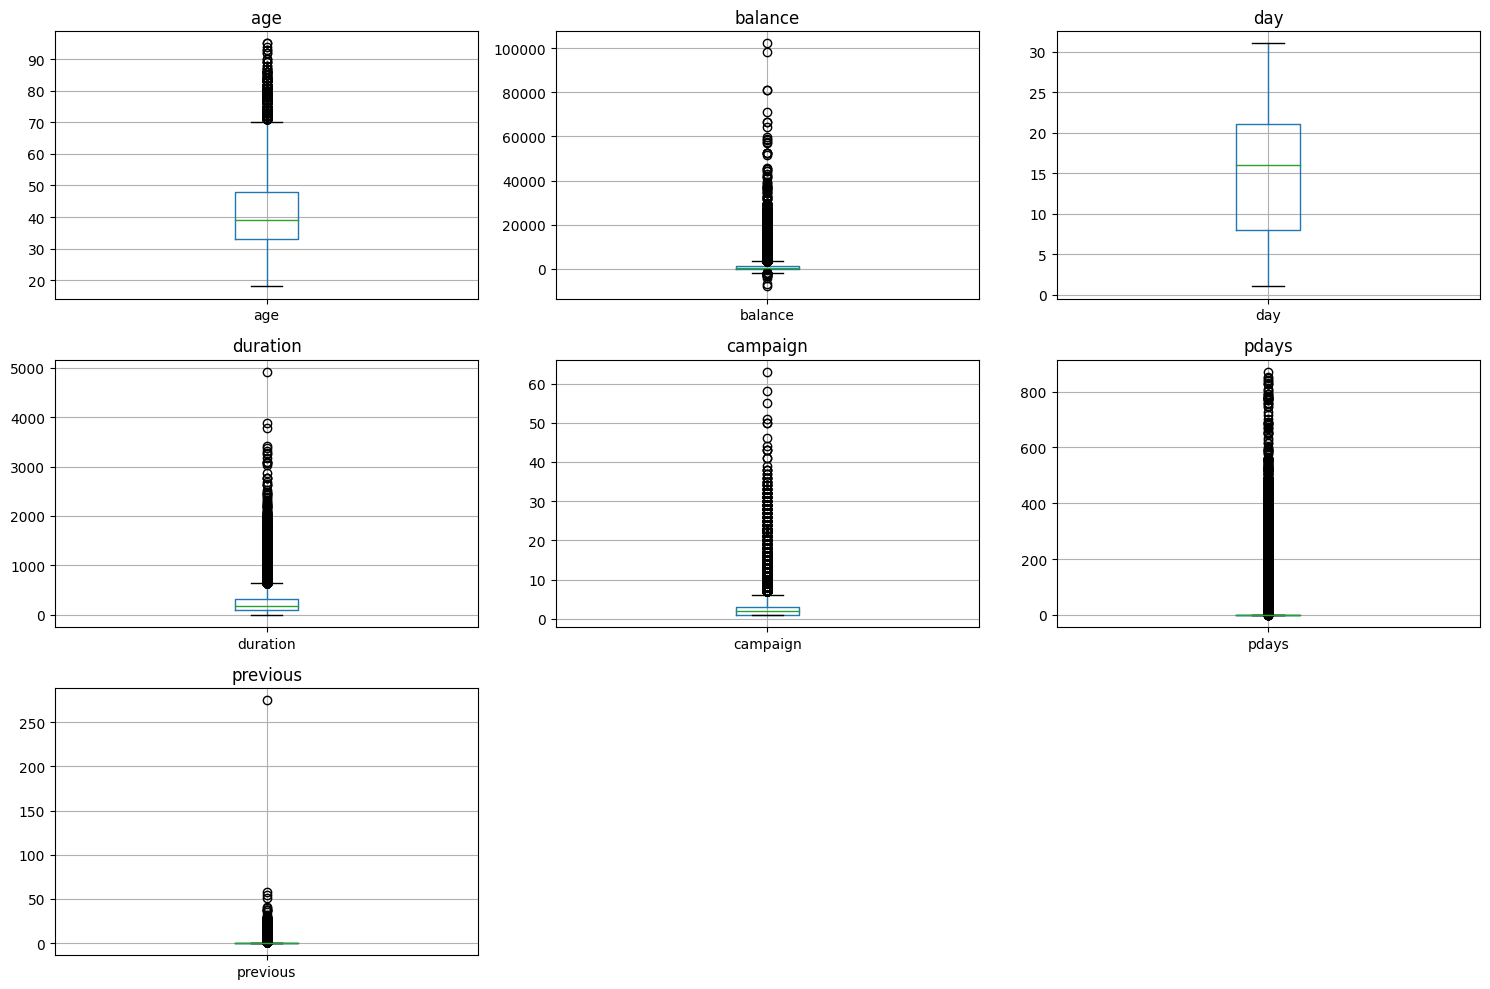

In [10]:
# Visual inspection using box plots
from matplotlib import pyplot as plt 
 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    bank_data.boxplot(column=[col]) 
    plt.title(col)

plt.tight_layout()
plt.show()

C:\Users\peyman\AppData\Local\Temp\ipykernel_26724\2800565456.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = bank_data.quantile(0.25)
C:\Users\peyman\AppData\Local\Temp\ipykernel_26724\2800565456.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = bank_data.quantile(0.75)
C:\Users\peyman\AppData\Local\Temp\ipykernel_26724\2800565456.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cleaned_bank_data = bank_data[~((bank_data < lower_bound) | (bank_data

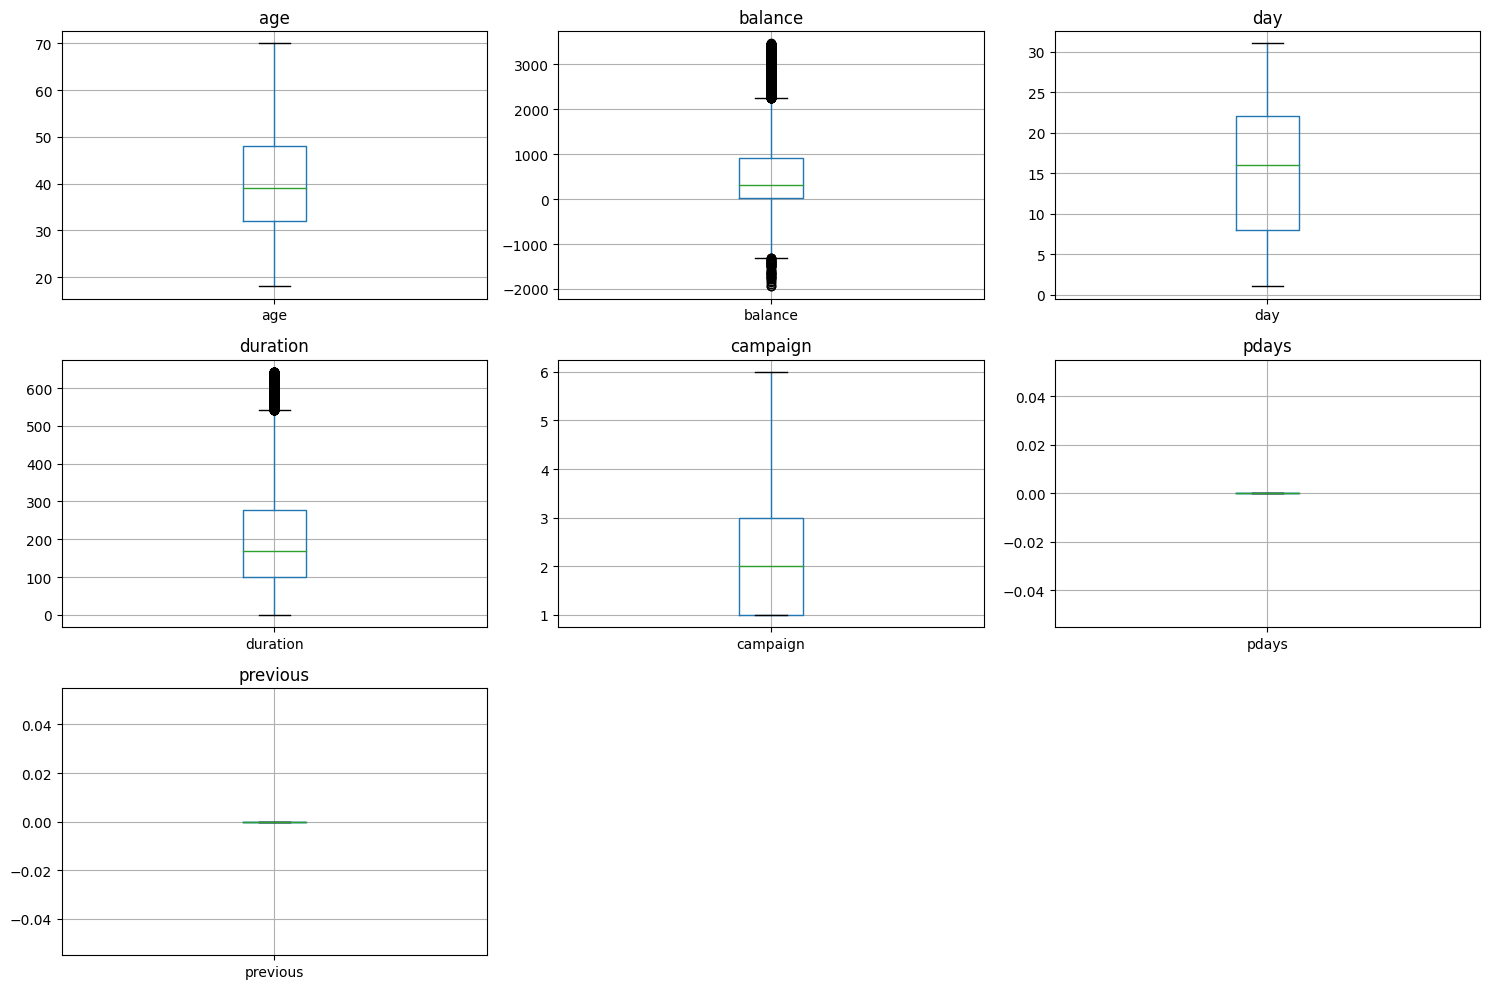

In [11]:
# Remove outliers with IQR method
Q1 = bank_data.quantile(0.25)
Q3 = bank_data.quantile(0.75)
IQR = Q3 - Q1
# Define the range of outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Delete outlier 
cleaned_bank_data = bank_data[~((bank_data < lower_bound) | (bank_data > upper_bound)).any(axis=1)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    cleaned_bank_data.boxplot(column=[col])
    plt.title(col)

plt.tight_layout()
plt.show()

C:\Users\peyman\AppData\Local\Temp\ipykernel_26724\1544814252.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_log'] = np.log1p(df[column] - df[column].min() + 1)


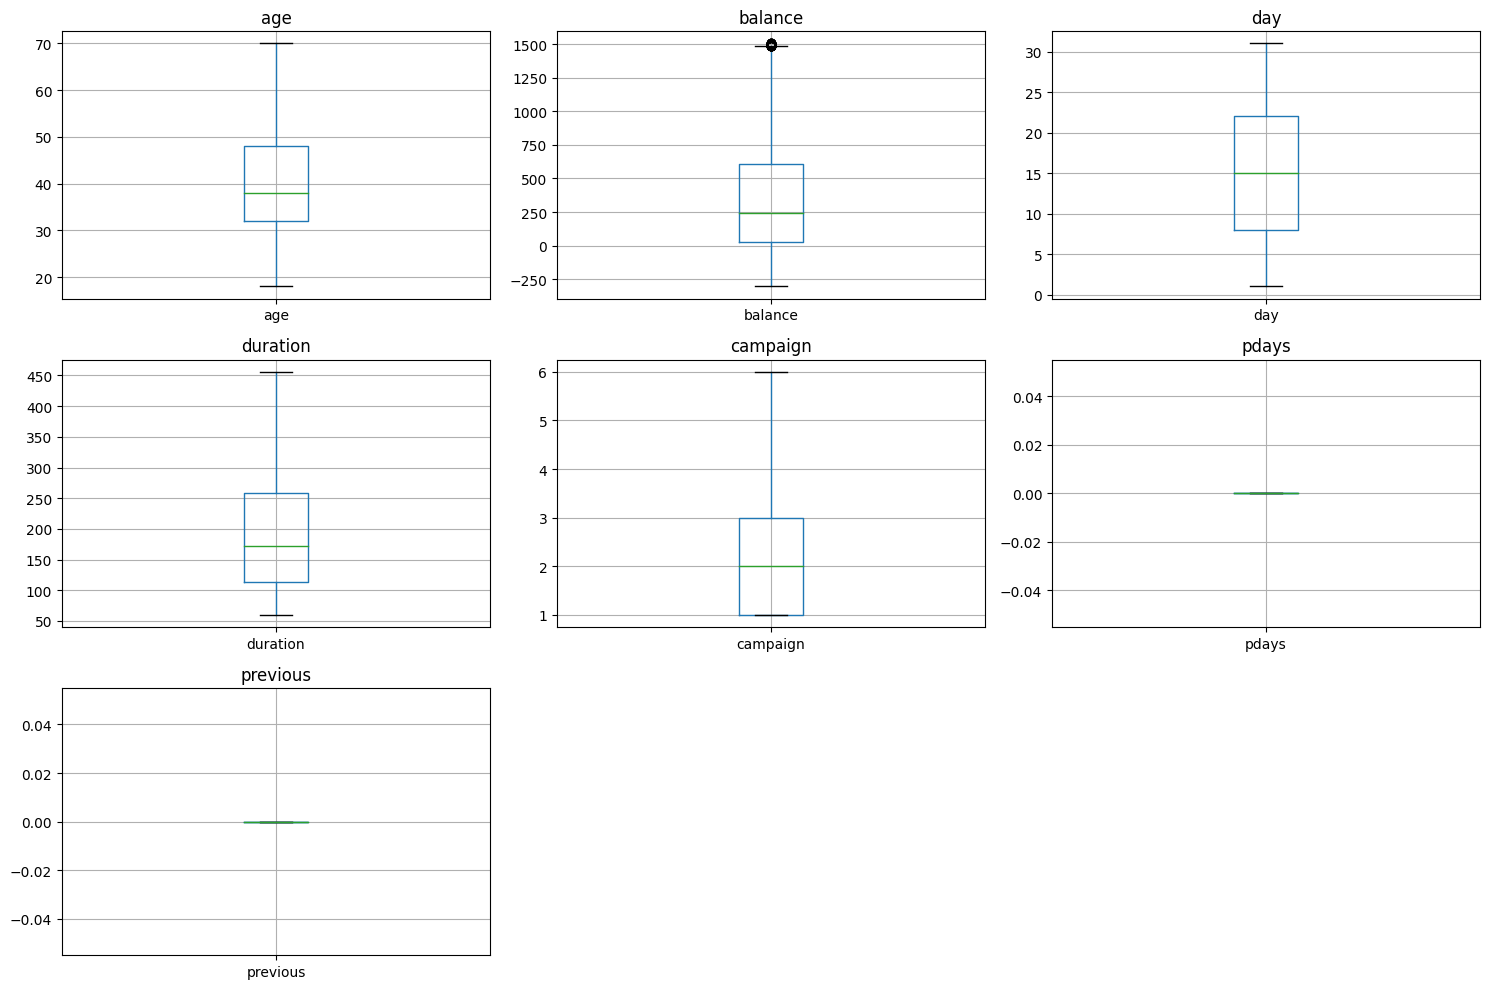

In [12]:
# The 'balance' and 'Duration' column seems to have a wide range and possibly a
# skewed distribution.So Applying a log transformation before outlier removal 
# might help normalize the distribution.

# Define function to remove more outlier from columns
def remove_outliers(df, column):
    # Step 1: Apply log transformation
    df[f'{column}_log'] = np.log1p(df[column] - df[column].min() + 1)
    
    # Step 2: Calculate IQR and define bounds
    Q1 = df[f'{column}_log'].quantile(0.25)
    Q3 = df[f'{column}_log'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    
    # Step 3: Remove outliers
    df_cleaned = df[(df[f'{column}_log'] >= lower_bound) & (df[f'{column}_log'] <= upper_bound)]
    
    # Step 4: Remove the log-transformed column
    df_cleaned = df_cleaned.drop(f'{column}_log', axis=1)
    
    return df_cleaned



# Apply the outlier removal function to both 'balance' and 'campaign' columns
df_cleaned = remove_outliers(cleaned_bank_data, 'balance')
new_bank_data = remove_outliers(df_cleaned, 'duration')

# Box plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    new_bank_data.boxplot(column=[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [13]:
new_bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.0,19239.0
mean,40.141743,368.150424,15.593274,194.947191,2.179271,0.0,0.0
std,9.836300,414.080554,8.353165,99.420231,1.322251,0.0,0.0
min,18.000000,-304.000000,1.000000,60.000000,1.000000,0.0,0.0
25%,32.000000,25.000000,8.000000,114.000000,1.000000,0.0,0.0
50%,38.000000,243.000000,15.000000,172.000000,2.000000,0.0,0.0
75%,48.000000,608.000000,22.000000,259.000000,3.000000,0.0,0.0
max,70.000000,1504.000000,31.000000,456.000000,6.000000,0.0,0.0


In [14]:
# Chevking for null values
new_bank_data.isnull().sum()


age               0
job               0
marital           0
education         0
default_status    0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

### Cleaning categorical columns

In [15]:
categorical_cols = new_bank_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default_status',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [16]:
# normalize all string columns
def normalize_string_columns(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.replace('.', '', regex=False)
            df[column] = df[column].str.lower().str.strip()
    return 
normalize_string_columns(new_bank_data)

In [17]:
# Count unique values in each column and display
def count_unique_values(df):
    for column in df.select_dtypes(include=['object']).columns:
        print(f"Counts of unique values in column '{column}':")
        print(df[column].value_counts(), '\n')

# Display counts of unique values for each column
count_unique_values(new_bank_data)

Counts of unique values in column 'job':
blue-collar      4266
management       3742
technician       3343
admin            2275
services         1943
retired           749
self-employed     668
entrepreneur      664
housemaid         596
unemployed        542
student           352
unknown            99
Name: job, dtype: int64 

Counts of unique values in column 'marital':
married     11494
single       5423
divorced     2322
Name: marital, dtype: int64 

Counts of unique values in column 'education':
secondary    10283
tertiary      5238
primary       2992
unknown        726
Name: education, dtype: int64 

Counts of unique values in column 'default_status':
no     18840
yes      399
Name: default_status, dtype: int64 

Counts of unique values in column 'housing':
yes    10642
no      8597
Name: housing, dtype: int64 

Counts of unique values in column 'loan':
no     15785
yes     3454
Name: loan, dtype: int64 

Counts of unique values in column 'contact':
cellular     11516
unknown   

In [18]:
# Indentify for the unknown values
placeholder = 'unknown'

# Count the unknown values in each column
unknown_counts = (new_bank_data == placeholder).sum()
print(unknown_counts)

# total number of unknown values in the entire dataset
total_unknown = (new_bank_data == placeholder).sum().sum()
print(f'Total unknown values in the dataset: {total_unknown}')

age                   0
job                  99
marital               0
education           726
default_status        0
balance               0
housing               0
loan                  0
contact            6867
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          19239
y                     0
dtype: int64
Total unknown values in the dataset: 26931


In [19]:
# Strategies for handling missing data 
#   1. Strategy for 'job' column: 
# Create a new category for unknown values.This is suitable because 
# there are relatively few unknown values.
new_bank_data['job'] = new_bank_data['job'].replace('unknown', 'other')


# 2. Strategy for 'education' column: 
# Impute with mode (most frequent value)
mode_education = new_bank_data['education'].mode()[0]
new_bank_data['education'] = new_bank_data['education'].replace('unknown', mode_education)


# 3. Strategy for 'contact' column: 
# Create a binary feature for known/unknown  to indicate whether 
# the contact method is known or unknown. 
# This preserves the information that the value was missing while
# allowing us to use the original 'contact' feature.
new_bank_data['contact_known'] = (new_bank_data['contact'] != 'unknown').astype(int)


# 4. Strategy for 'poutcome' column: 
# Keep as is, treating 'unknown' as a valid category. no action need


In [20]:
# Reindex data set
new_bank_data = new_bank_data.reset_index(drop=True)
new_bank_data.index = new_bank_data.index + 1
new_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 1 to 19239
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19239 non-null  int64 
 1   job             19239 non-null  object
 2   marital         19239 non-null  object
 3   education       19239 non-null  object
 4   default_status  19239 non-null  object
 5   balance         19239 non-null  int32 
 6   housing         19239 non-null  object
 7   loan            19239 non-null  object
 8   contact         19239 non-null  object
 9   day             19239 non-null  int64 
 10  month           19239 non-null  object
 11  duration        19239 non-null  int64 
 12  campaign        19239 non-null  int64 
 13  pdays           19239 non-null  int64 
 14  previous        19239 non-null  int64 
 15  poutcome        19239 non-null  object
 16  y               19239 non-null  object
 17  contact_known   19239 non-null  int32 
dtypes: int

In [21]:
new_bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default_status    0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
contact_known     0
dtype: int64

# **Step 4:  Exploratory Data Analysis (EDA)**

### Descriptive Statistics

In [22]:
new_bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous,contact_known
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.0,19239.0,19239.000000
mean,40.141743,368.150424,15.593274,194.947191,2.179271,0.0,0.0,0.643069
std,9.836300,414.080554,8.353165,99.420231,1.322251,0.0,0.0,0.479107
min,18.000000,-304.000000,1.000000,60.000000,1.000000,0.0,0.0,0.000000
25%,32.000000,25.000000,8.000000,114.000000,1.000000,0.0,0.0,0.000000
50%,38.000000,243.000000,15.000000,172.000000,2.000000,0.0,0.0,1.000000
75%,48.000000,608.000000,22.000000,259.000000,3.000000,0.0,0.0,1.000000
max,70.000000,1504.000000,31.000000,456.000000,6.000000,0.0,0.0,1.000000


### **Visualization Numerical features**

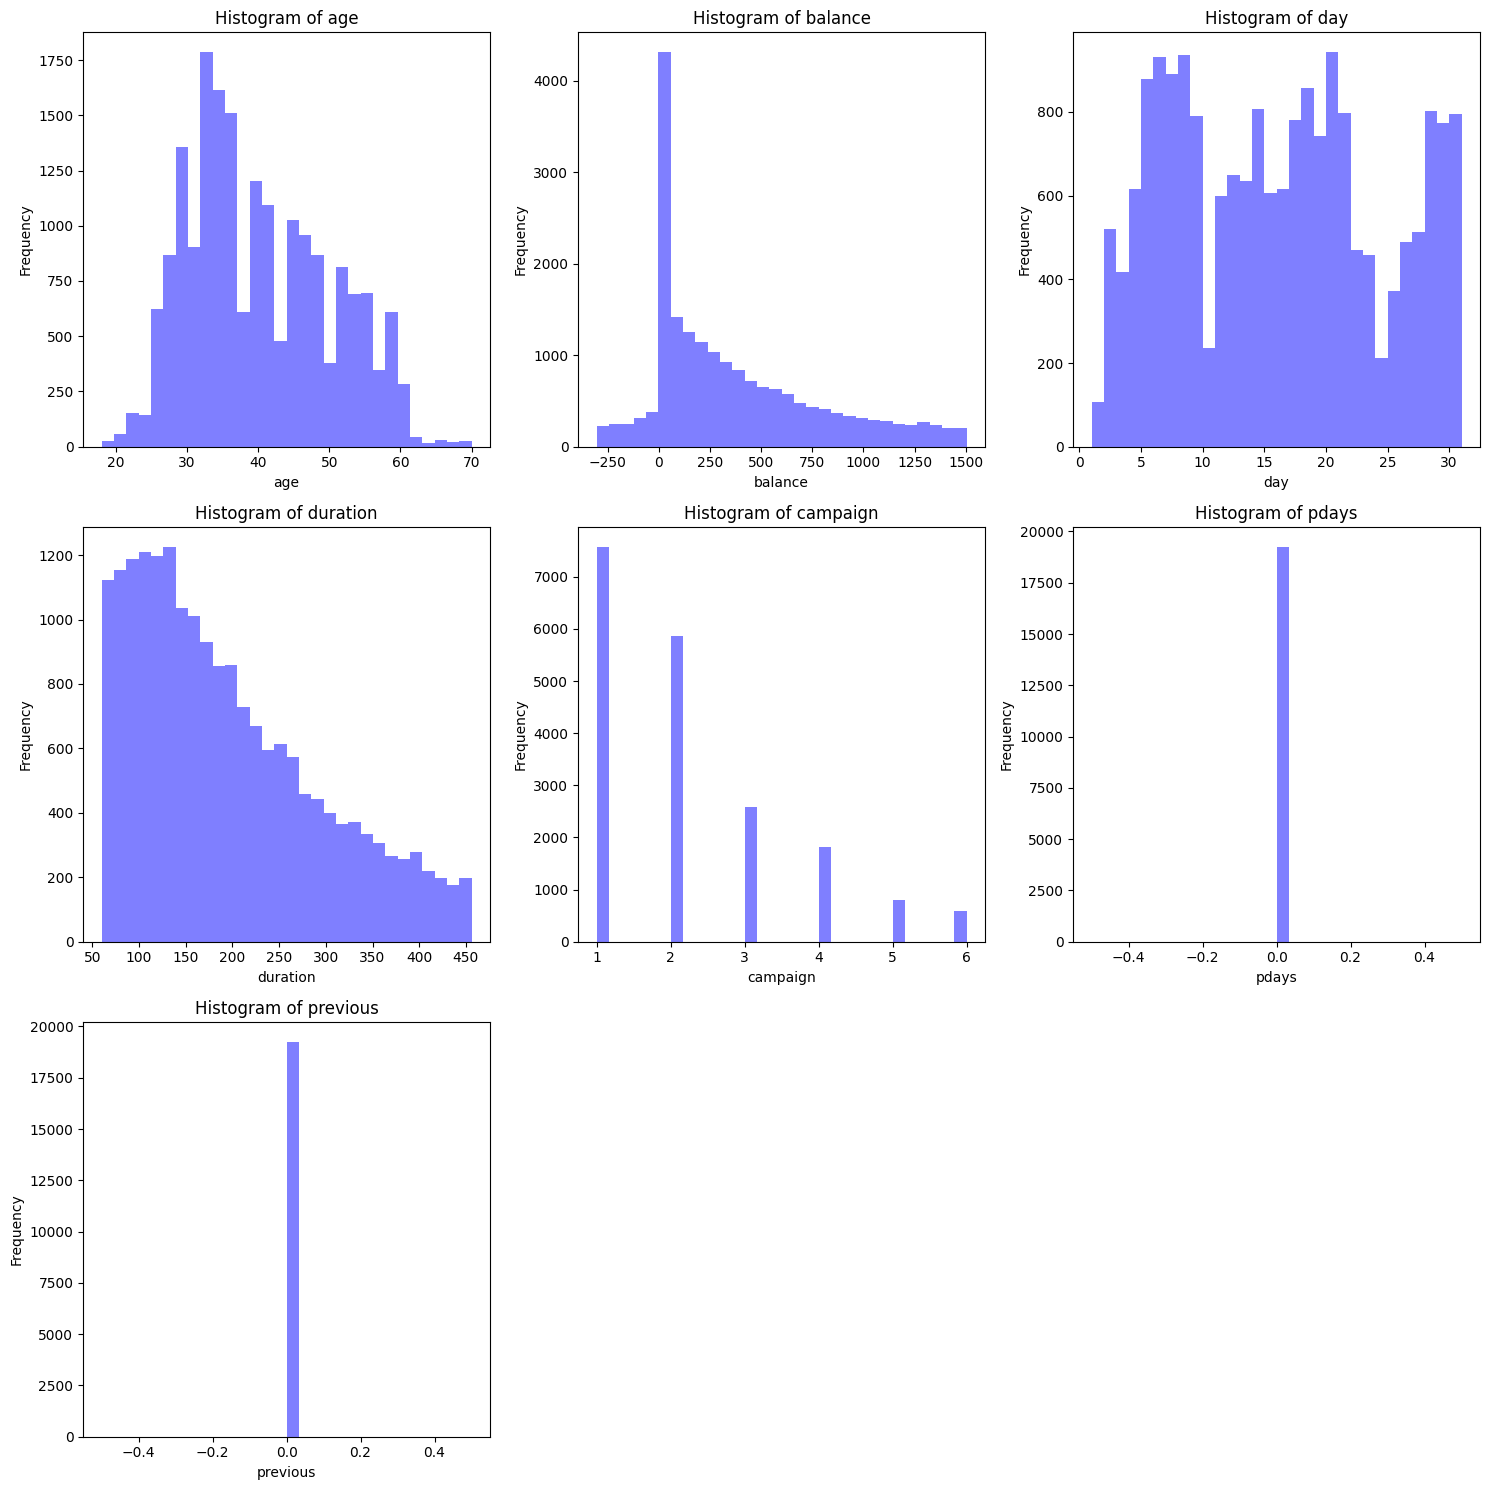

In [23]:
# 1. Distribution Analysis for numerical

# Set the number of rows and columns for subplots based on the number of numerical columns
n_cols = 3  # Number of columns in subplot grid
n_rows = (len(new_bank_data[numerical_cols].columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure and an array of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the array of axes if needed
axs = axs.flatten()

# Iterate over the columns and create a histogram for each
for i, col in enumerate(new_bank_data[numerical_cols].columns):
    axs[i].hist(new_bank_data[col], bins=30, alpha=0.5, color='blue')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Hide unused subplots if there are any
for ax in axs[len(new_bank_data[numerical_cols].columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


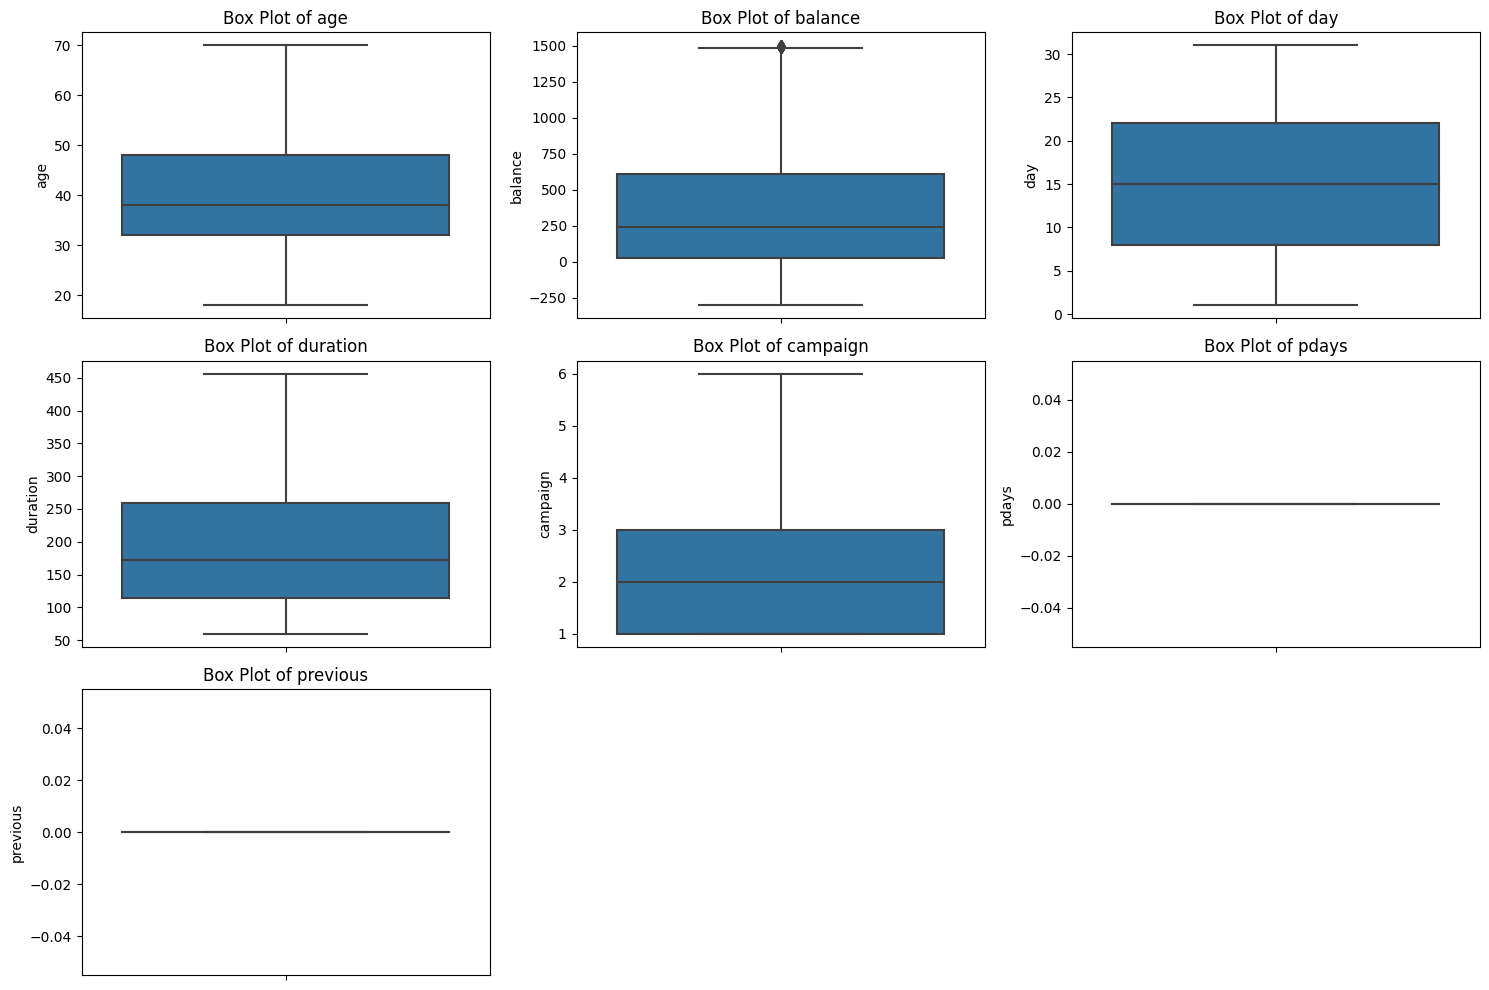

In [24]:
# 2. Creating a box plot for each numerical variable
import seaborn as sns 
# Setting up the plotting area
plt.figure(figsize=(15, 10))

for i, col in enumerate(new_bank_data[numerical_cols]):
    plt.subplot(3, 3, i+1)  # Adjust the grid dimensions based on your number of variables
    sns.boxplot(y=new_bank_data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


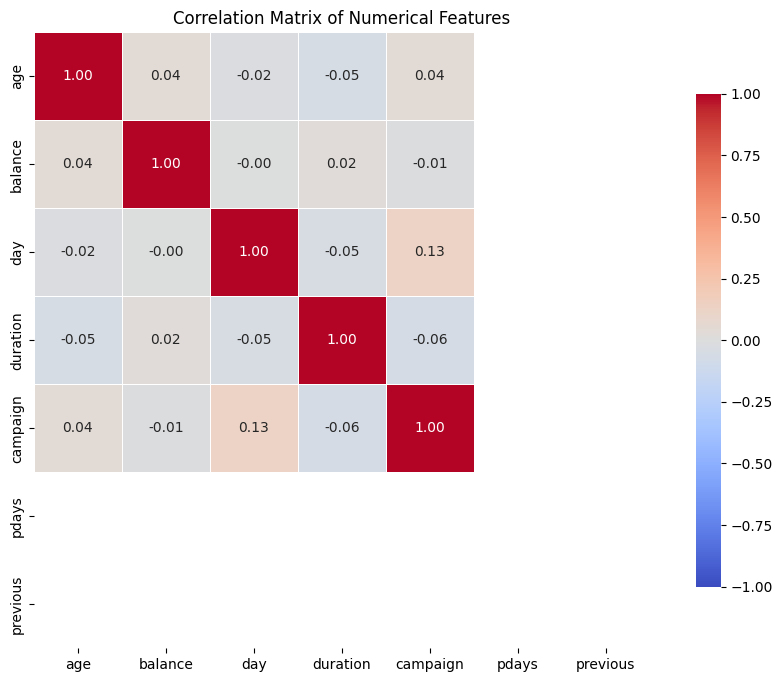

In [25]:
#2. Correlation matrix for New_df_bank_data
corr_matrix = new_bank_data[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            
            annot=True,  
            cmap='coolwarm',
            vmin=-1, vmax=1,  
            center=0,  
            fmt='.2f', 
            square=True,  
            linewidths=0.5, 
            cbar_kws={'shrink': .8},  
            annot_kws={'size': 10}) 
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Visualization categorical Features**

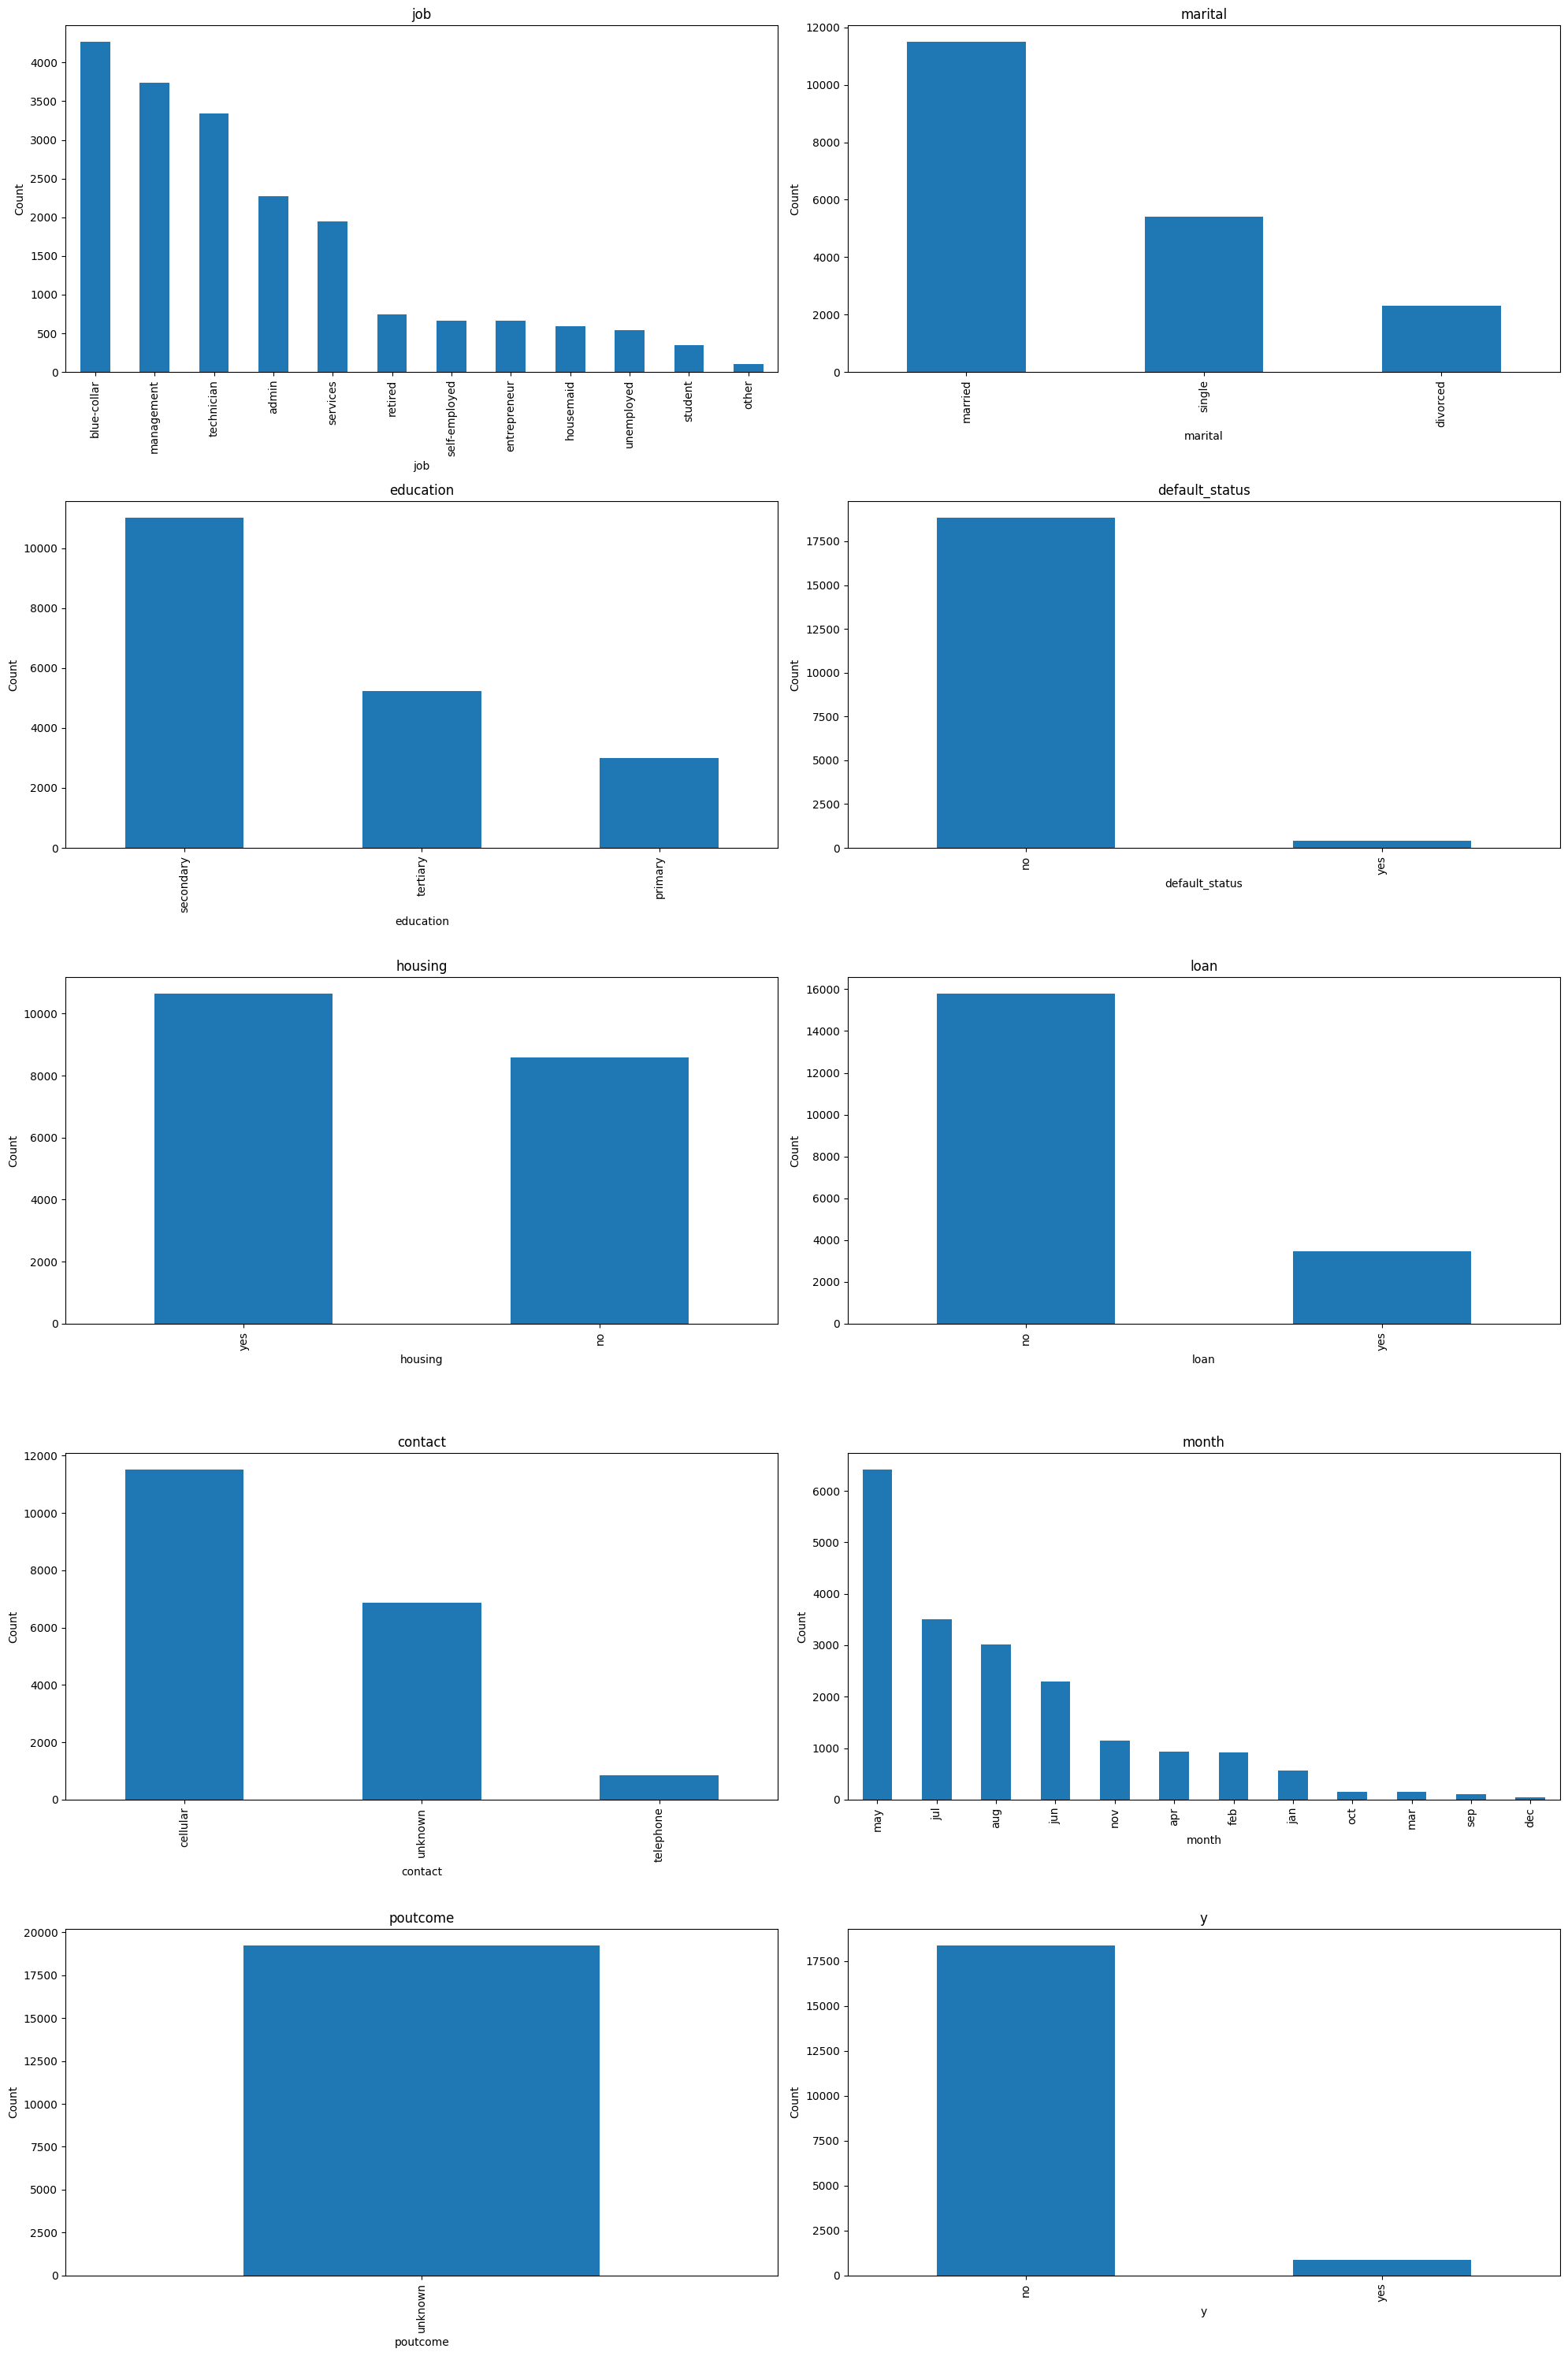

In [26]:
# Plot bar charts for each categorical variable
plt.figure(figsize=(20, 30))
for i, col in enumerate(new_bank_data[categorical_cols], 1):
    plt.subplot(5, 2, i)
    new_bank_data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.ylabel('Count')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

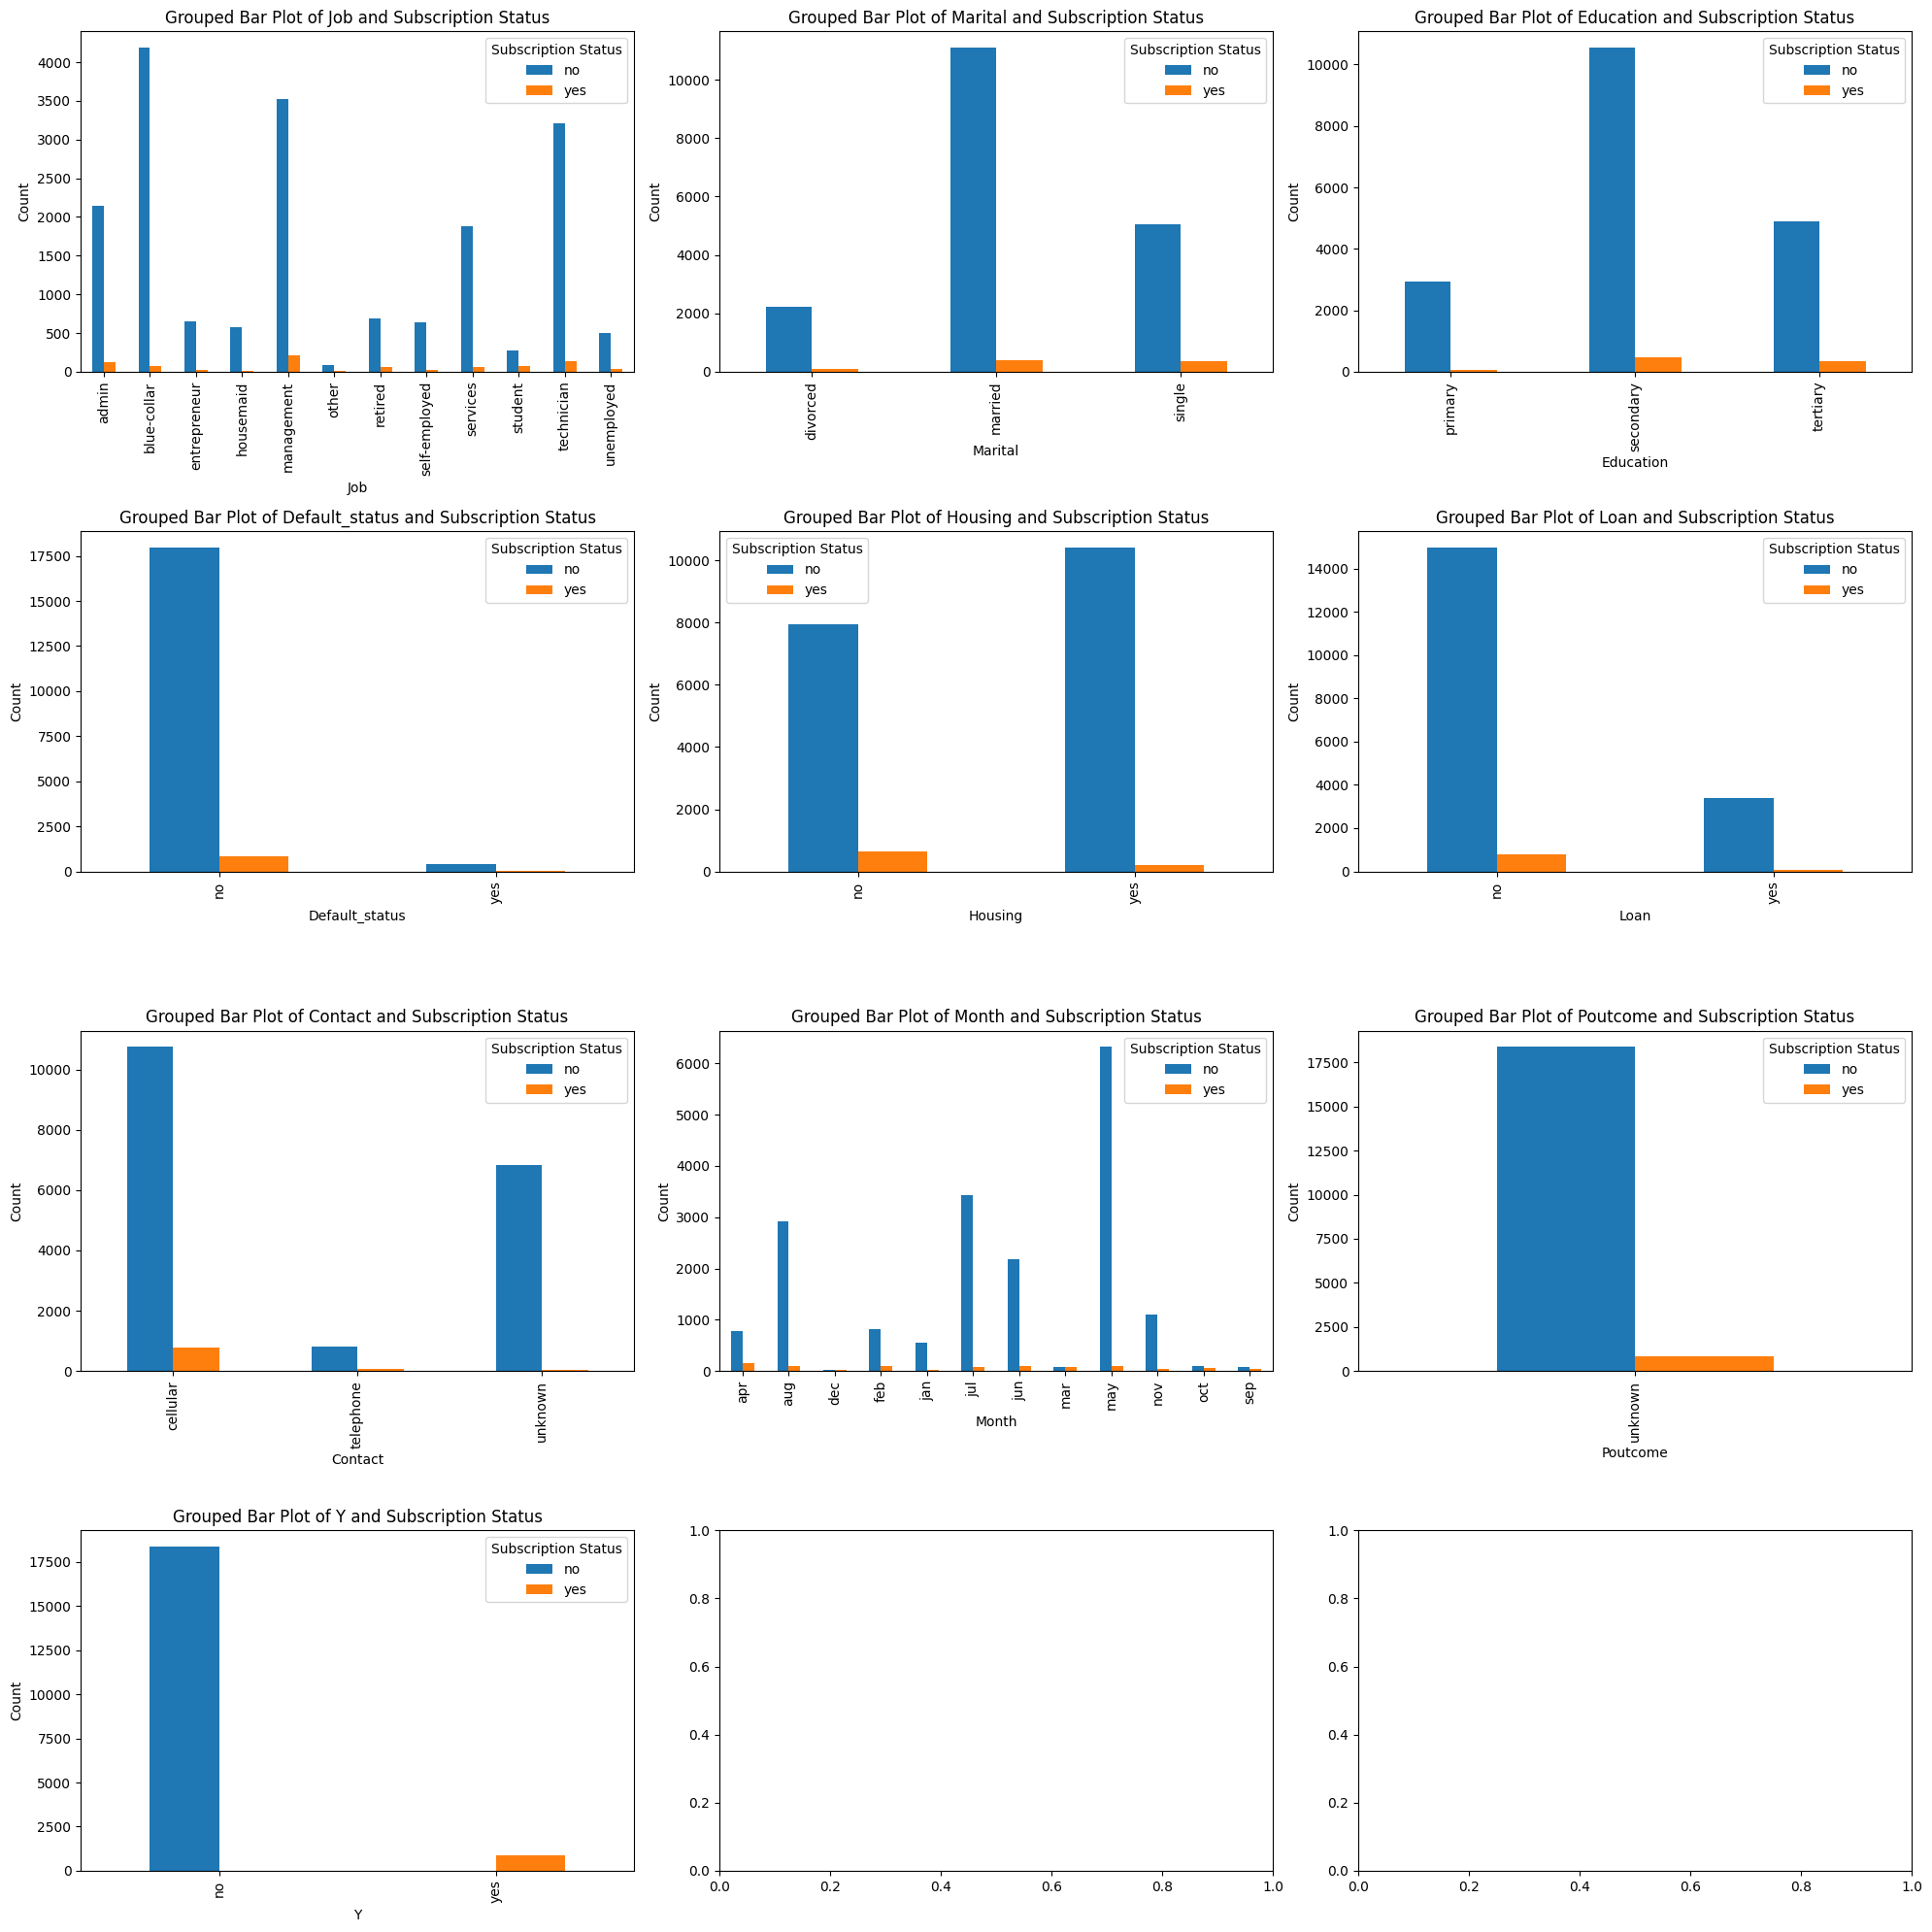

In [27]:
# Grouped Bar Plot (Clustered Bar Plot)
# usage : To compare multiple categorical variables side by side.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

# Function to create grouped bar plot for a given categorical variable
def plot_grouped_bar(variable, ax):
    crosstab = pd.crosstab(new_bank_data[variable], new_bank_data['y'])
    crosstab.plot(kind='bar', ax=ax)
    ax.set_title(f'Grouped Bar Plot of {variable.capitalize()} and Subscription Status')
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Subscription Status')

# Plot grouped bar plots for each categorical variable
for i, variable in enumerate(new_bank_data[categorical_cols]):
    plot_grouped_bar(variable, axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

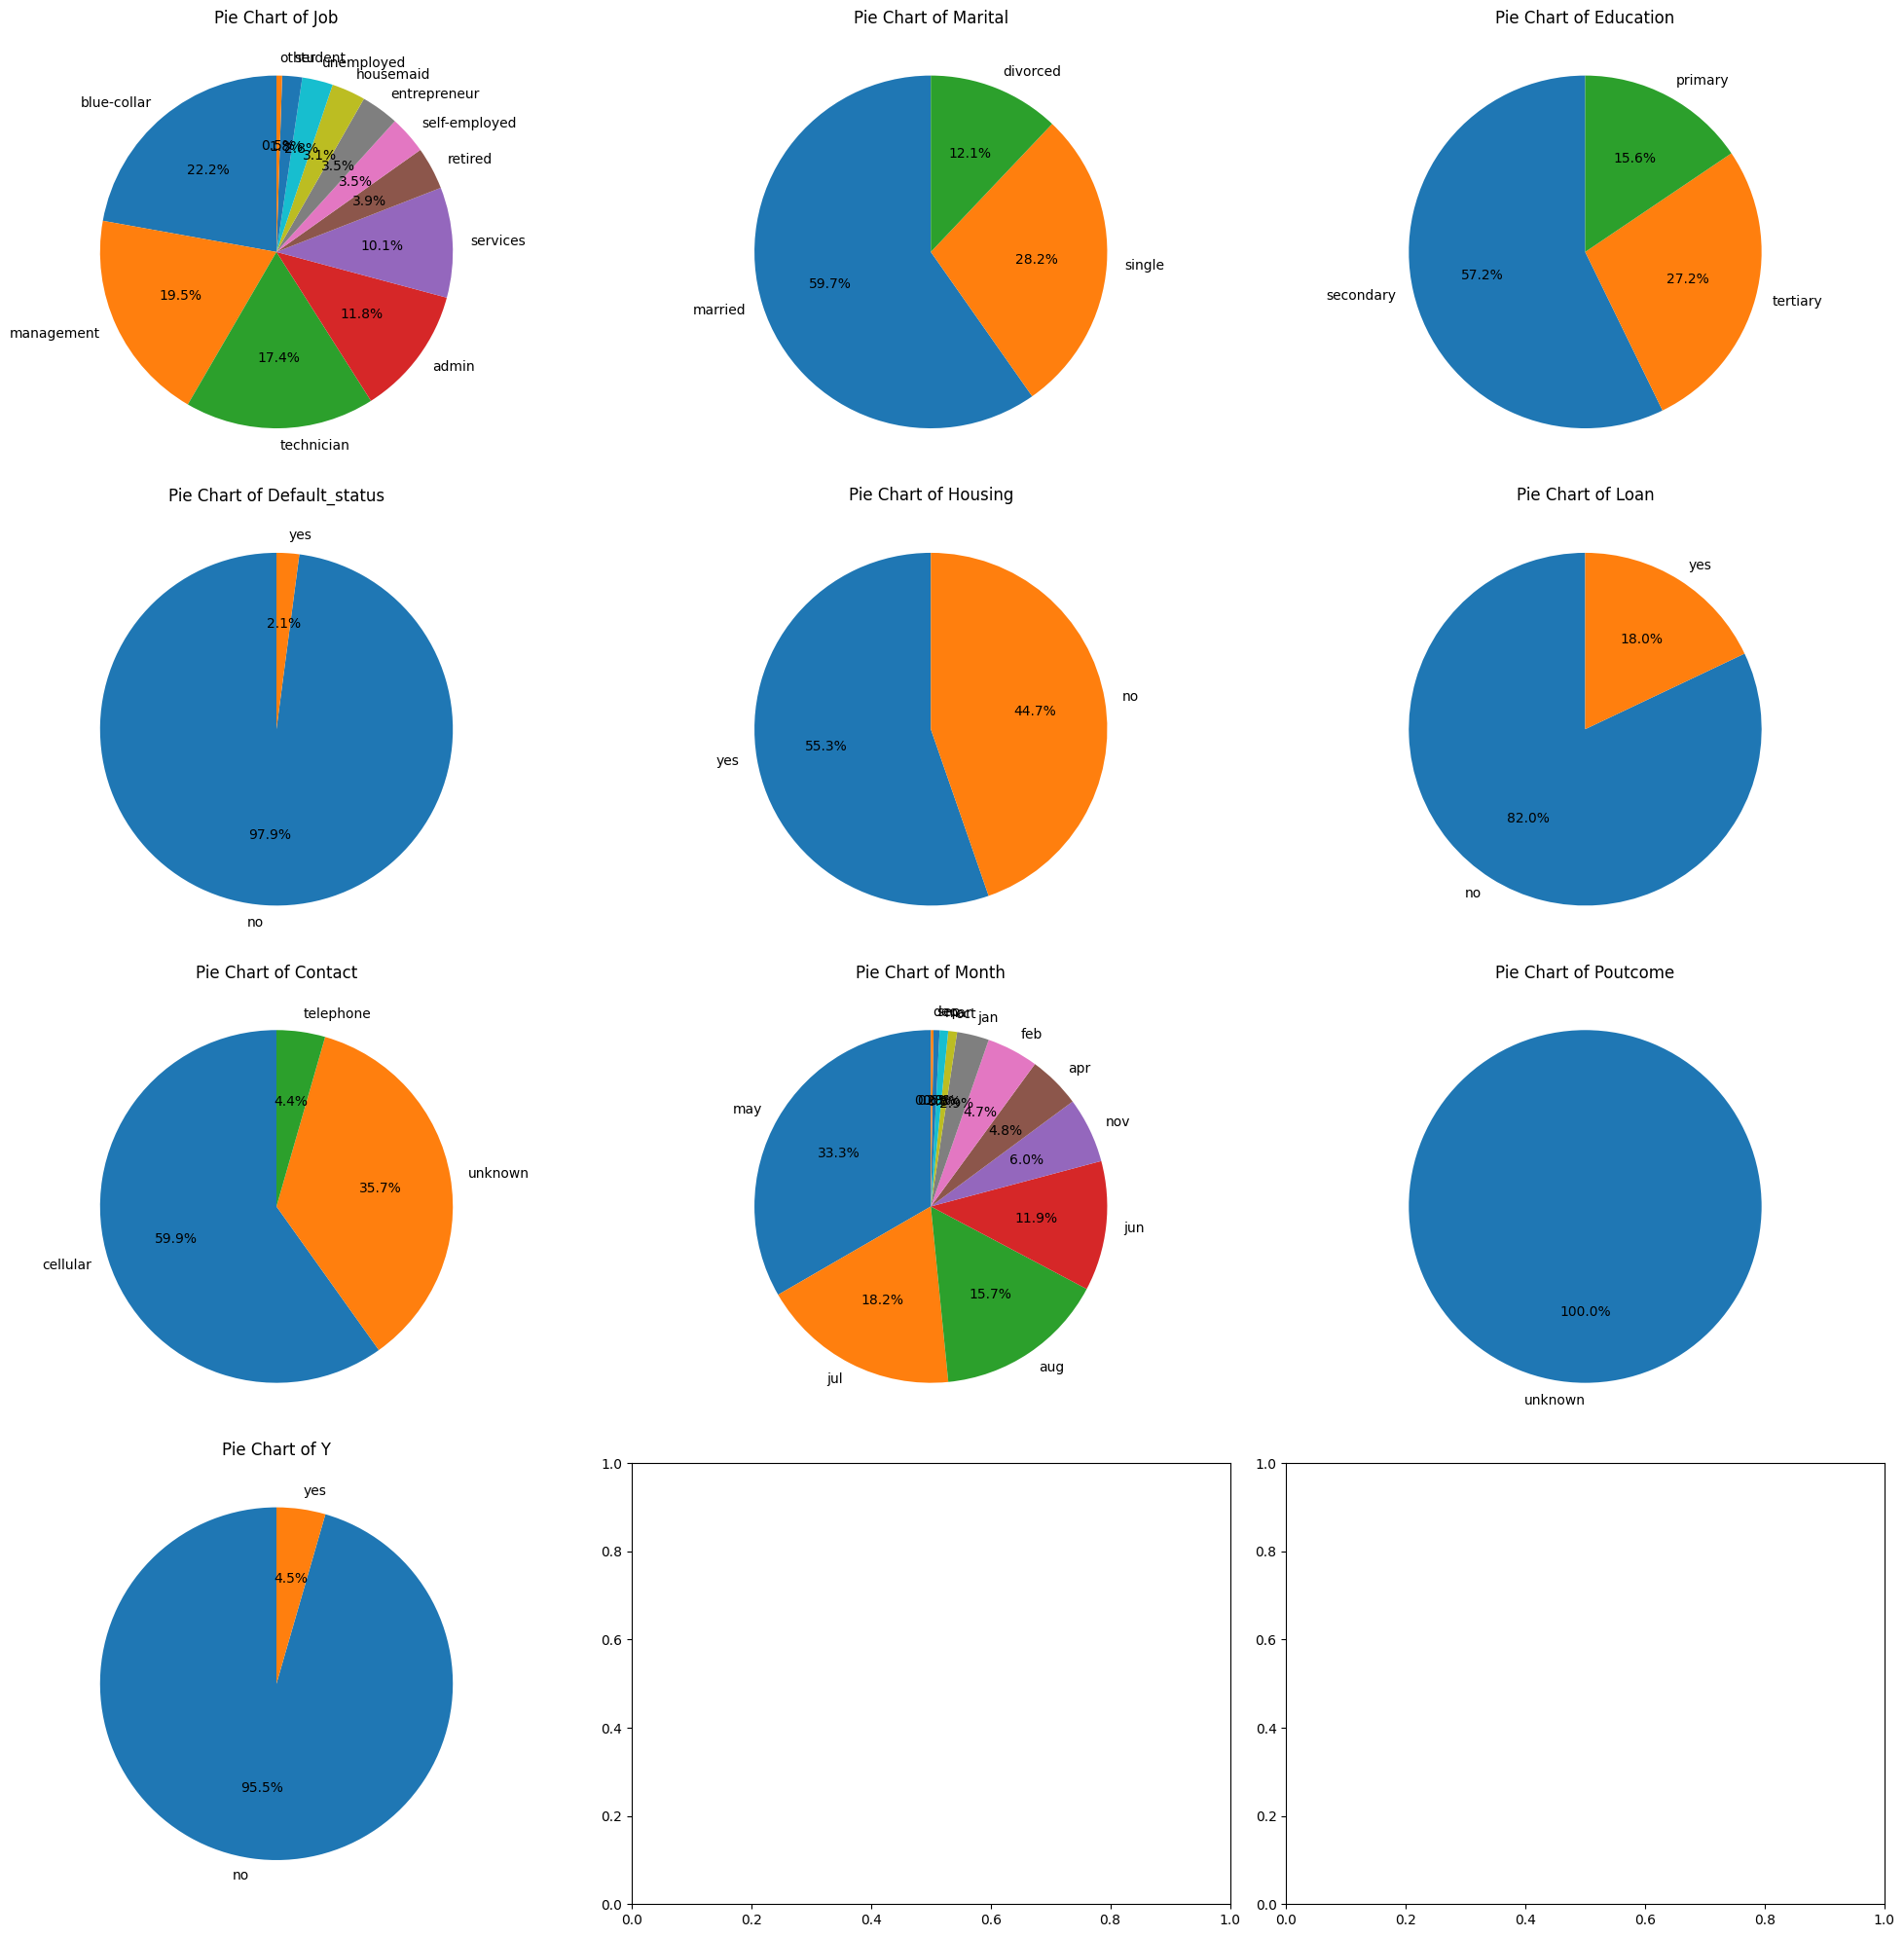

In [28]:

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

# Function to create a pie chart for a given categorical variable
def plot_pie(variable, ax):
    new_bank_data[variable].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pie Chart of {variable.capitalize()}')
    ax.set_ylabel('')

# Plot pie charts for each categorical variable
for i, variable in enumerate(new_bank_data[categorical_cols]):
    plot_pie(variable, axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


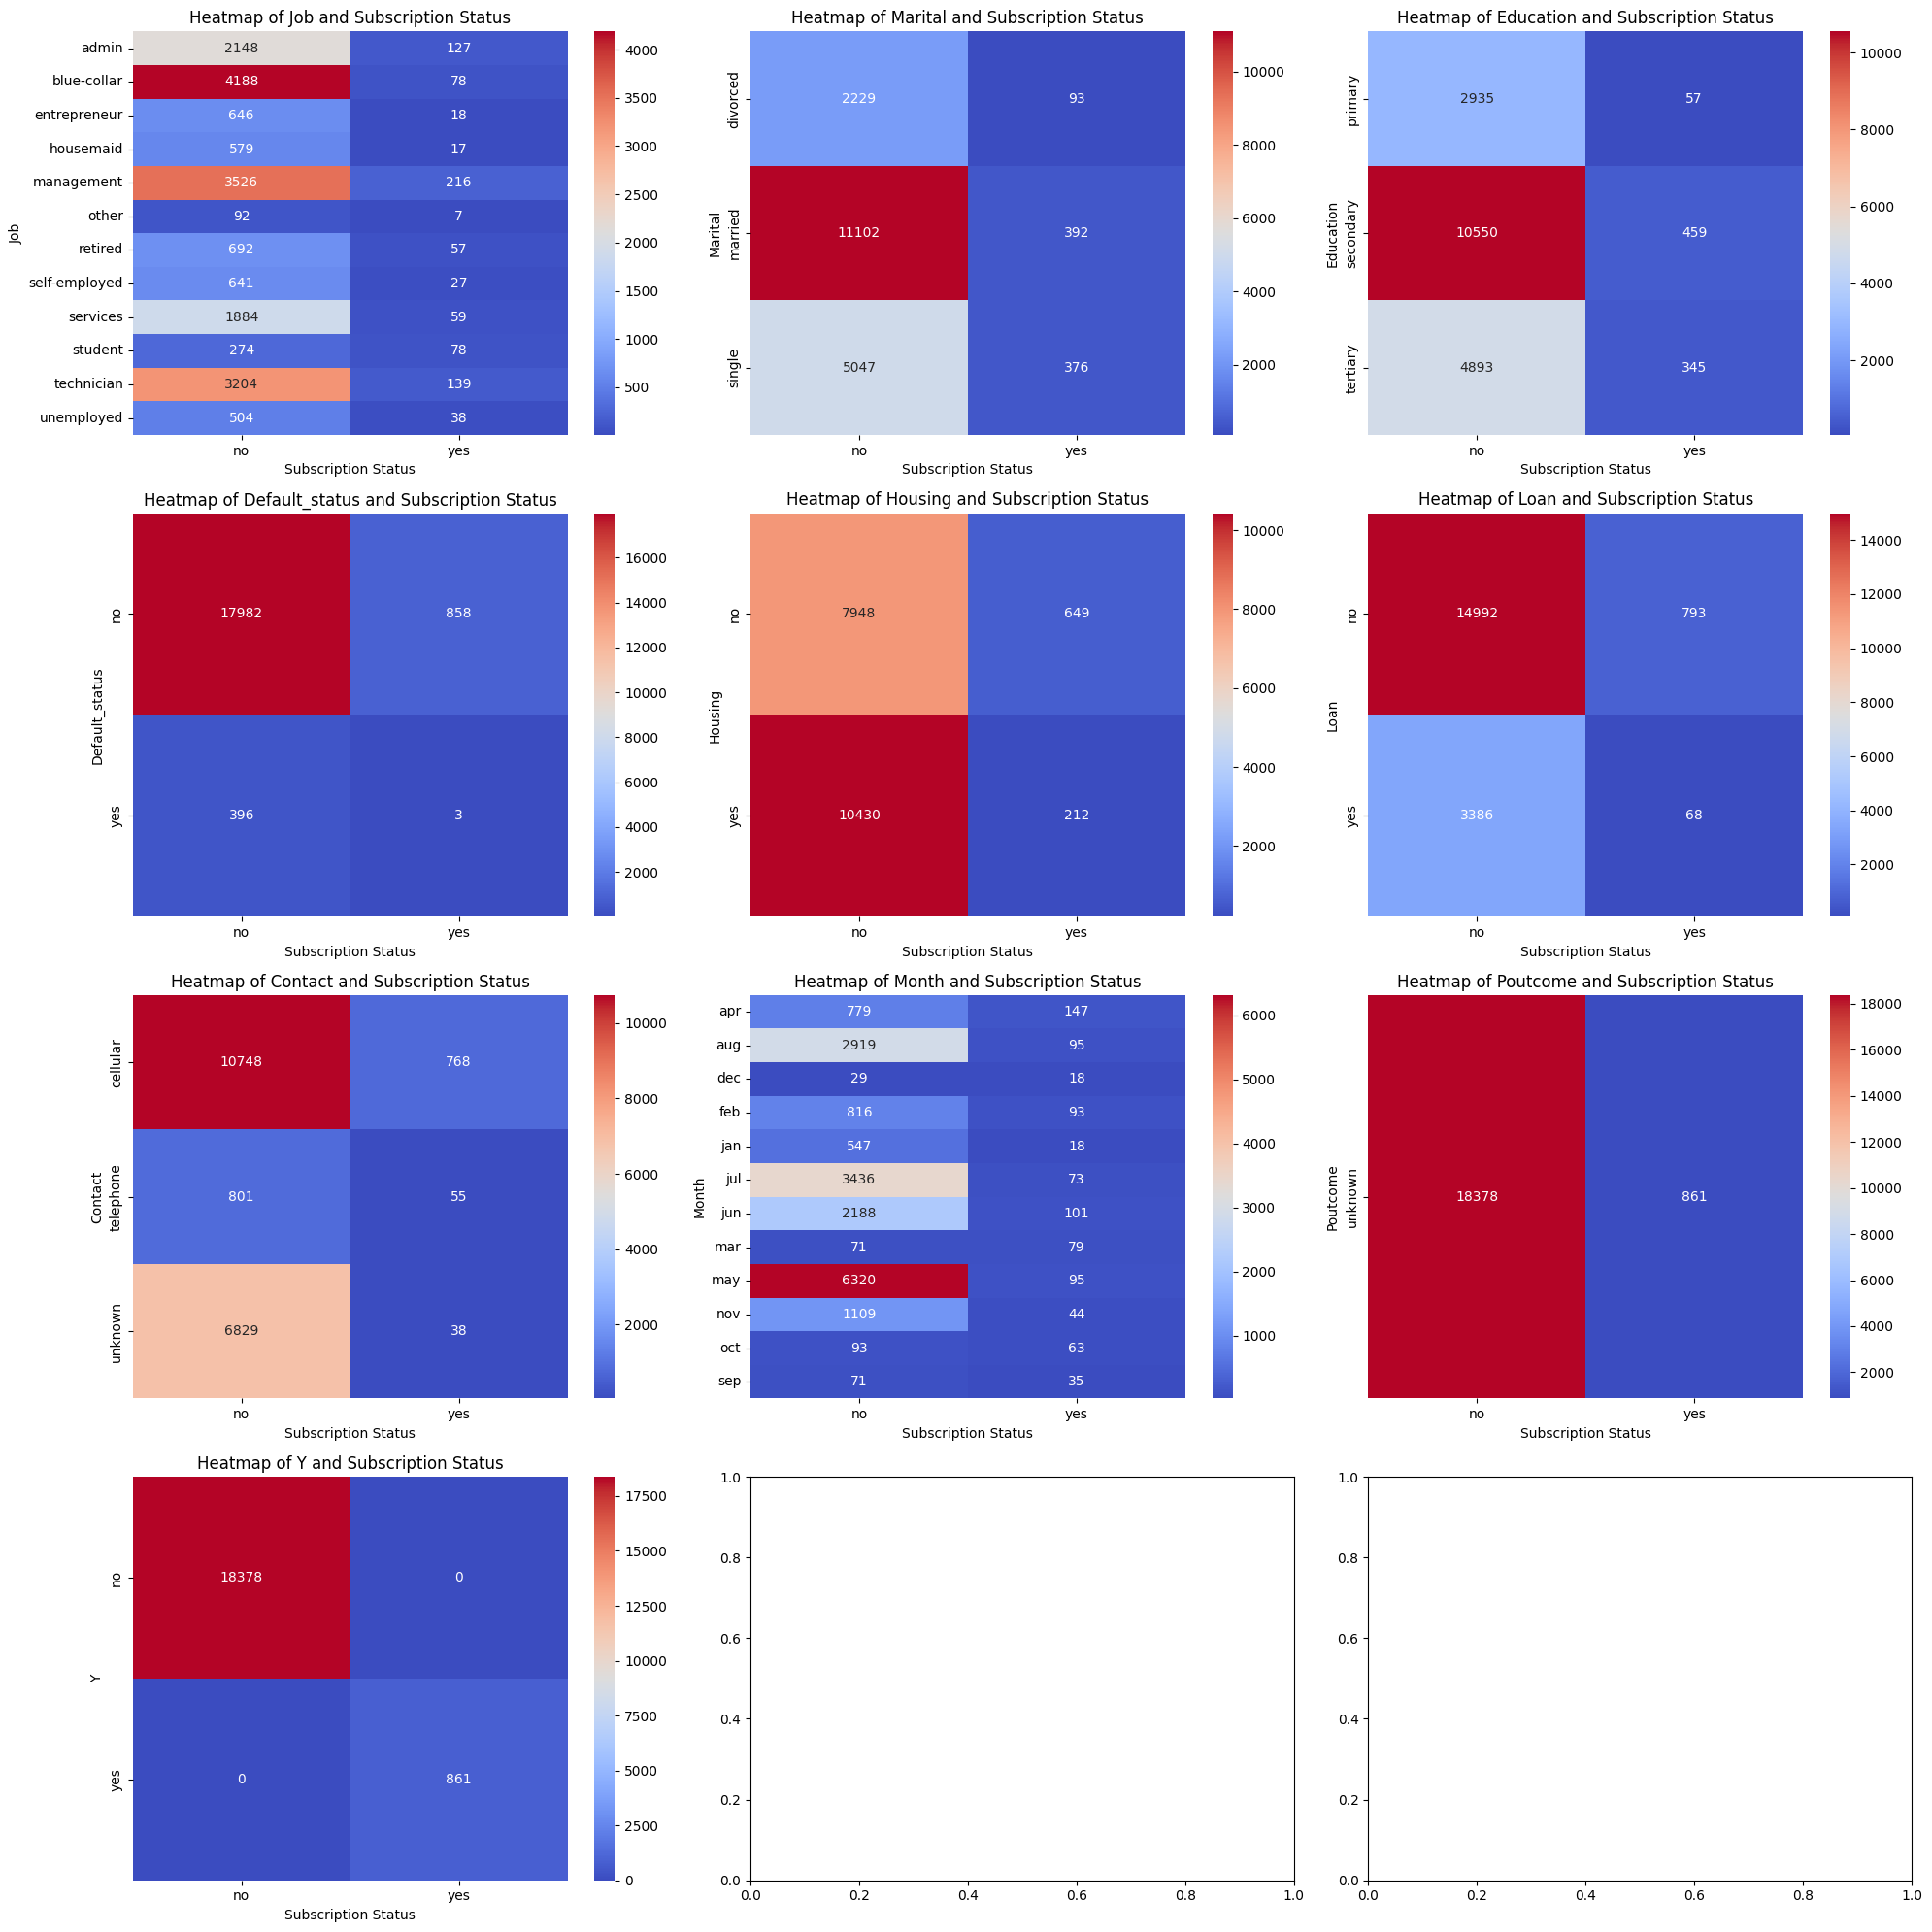

In [29]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

# Function to create a heatmap for a given categorical variable
def plot_heatmap(variable, ax):
    crosstab = pd.crosstab(new_bank_data[variable], new_bank_data['y'])
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm', ax=ax)
    ax.set_title(f'Heatmap of {variable.capitalize()} and Subscription Status')
    ax.set_xlabel('Subscription Status')
    ax.set_ylabel(variable.capitalize())

# Plot heatmaps for each categorical variable
for i, variable in enumerate(new_bank_data[categorical_cols]):
    plot_heatmap(variable, axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

# **Step 5:Feature Enginering**


### Encoding Feature

In [30]:
# Identify and split categorical columns 
yes_no_column = ['default_status', 'housing', 'loan', 'y'] 
ordinal_column = ['education']
remain_categorical_columns = [col for col in categorical_cols if col not in yes_no_column + ordinal_column]
yes_no_column, ordinal_column, remain_categorical_columns

(['default_status', 'housing', 'loan', 'y'],
 ['education'],
 ['job', 'marital', 'contact', 'month', 'poutcome'])

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
transformed_bank_data = new_bank_data.copy()
# Apply for the yes/no columns
for col in yes_no_column:
    transformed_bank_data[col] = label_encoder.fit_transform(transformed_bank_data[col])
    
# Apply for the 'education' column
education_mapping = {
    'primary': 0,
    'secondary': 1,
    'tertiary': 2,
    'unknown': 3}
transformed_bank_data['education_encoded'] = label_encoder.fit_transform(transformed_bank_data['education'].map(education_mapping))
# Drop the original education column
transformed_bank_data.drop(columns = ['education'] , inplace = True)


In [32]:
print(transformed_bank_data.info())
print(transformed_bank_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 1 to 19239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                19239 non-null  int64 
 1   job                19239 non-null  object
 2   marital            19239 non-null  object
 3   default_status     19239 non-null  int32 
 4   balance            19239 non-null  int32 
 5   housing            19239 non-null  int32 
 6   loan               19239 non-null  int32 
 7   contact            19239 non-null  object
 8   day                19239 non-null  int64 
 9   month              19239 non-null  object
 10  duration           19239 non-null  int64 
 11  campaign           19239 non-null  int64 
 12  pdays              19239 non-null  int64 
 13  previous           19239 non-null  int64 
 14  poutcome           19239 non-null  object
 15  y                  19239 non-null  int32 
 16  contact_known      19239 non-null  int32

In [33]:
# Initialize the OneHotEncoder
onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Fit and transform the categorical columns
encoded_cols = onehot.fit_transform(transformed_bank_data[remain_categorical_columns])
# Get the new column names
new_columns = onehot.get_feature_names_out(remain_categorical_columns)

# Create a new DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_cols, columns=new_columns, index=transformed_bank_data.index)
# Concatenate the encoded DataFrame with the original numeric columns
final_df = pd.concat([transformed_bank_data,encoded_df], axis=1)
final_df = final_df.drop(columns= ['job', 'marital', 'contact', 'month', 'poutcome' ])

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 1 to 19239
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                19239 non-null  int64  
 1   default_status     19239 non-null  int32  
 2   balance            19239 non-null  int32  
 3   housing            19239 non-null  int32  
 4   loan               19239 non-null  int32  
 5   day                19239 non-null  int64  
 6   duration           19239 non-null  int64  
 7   campaign           19239 non-null  int64  
 8   pdays              19239 non-null  int64  
 9   previous           19239 non-null  int64  
 10  y                  19239 non-null  int32  
 11  contact_known      19239 non-null  int32  
 12  education_encoded  19239 non-null  int64  
 13  job_admin          19239 non-null  float64
 14  job_blue-collar    19239 non-null  float64
 15  job_entrepreneur   19239 non-null  float64
 16  job_housemaid      192

### Splite and Scale data

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler


# Split data 
X = final_df.drop(['y'], axis=1)  # Remove target variable 
y = final_df['y']


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the normalization 
scaler  = StandardScaler()

# Fit the normalizer on the training data and transform both training and test data
X_train_normalized = scaler .fit_transform(x_train)
X_test_normalized = scaler.transform(x_test)

# **Step 6 : Model Bulding**




**Choose Models :**



1.   Linear Regression
2.   Logistic Regression
3.   Decision Tree
4.   Random Forest
5.   Gradient Boosting Machine (GBM)
6.   Support Vector Machine (SVM)
7.   K-Nearest Neighbors (KNN)
8.   Neural Network(NN)
9.   Principal Component Analysis (PCA)


### **Define Requare Functions**

In [37]:
# Define the functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report
from sklearn.metrics import log_loss

def Evaluate_model(model_name , y_test , y_pred , y_pred_proba):

    accuracy= accuracy_score(y_test, np.where(y_pred > 0.5, 1, 0))
    precision = precision_score(y_test, np.where(y_pred > 0.5, 1, 0))
    recall = recall_score(y_test, np.where(y_pred > 0.5, 1, 0))
    f1 = f1_score(y_test, np.where(y_pred > 0.5, 1, 0))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    logloss = log_loss(y_test, y_pred_proba)
        # Create a DataFrame with the evaluation metrics
    metrics = {
        model_name : [accuracy,precision,recall,f1,roc_auc,logloss]}
    index = [
        'Accuracy',
        'Precision',
        'Recall',
        'F1 Score',
        'ROC AUC',
        'logloss'
    ]

    df_metrics = pd.DataFrame(metrics, index=index )
    
    
    return df_metrics 

def classification_model(model_name , y_test , y_pred):
    result = classification_report(y_test, y_pred)
    print(r'The classification report for', model_name ,'is :')
    
    return result

def classification_report_to_dataframe(y_true, y_pred):
    # Generate the classification report as a dictionary
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(report_dict).transpose()
    # Reorder columns if present
    column_order = ['precision', 'recall', 'f1-score', 'support']
    df = df.reindex(columns=[col for col in column_order if col in df.columns])
    # Convert 'support' to integer if present
    if 'support' in df.columns:
        df['support'] = df['support'].astype(int)
    
    return df

def get_confusion_matrix_df(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
        
    # Create index and column names
    index_names = ['Actual Negative', 'Actual Positive']
    column_names = ['Predicted Negative', 'Predicted Positive']
    
    # Convert to DataFrame
    df_cm = pd.DataFrame(cm, index=index_names, columns=column_names)
    
    return df_cm


#  plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix- Initial Model'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# plot ROC Curve and AUC
def plot_roc_curve(y_true, y_proba, title='ROC Curve- Initial Model'):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()


# Plot Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_proba, title='Precision-Recall Curve- Initial Model'):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()



## **1. Logistic regression**

The classification report for Logistic_Regression is :


,Logistic_Regression
Accuracy,0.952443
Precision,0.586957
Recall,0.141361
F1 Score,0.227848
ROC AUC,0.894891
logloss,0.137404


None
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3657
           1       0.59      0.14      0.23       191

    accuracy                           0.95      3848
   macro avg       0.77      0.57      0.60      3848
weighted avg       0.94      0.95      0.94      3848



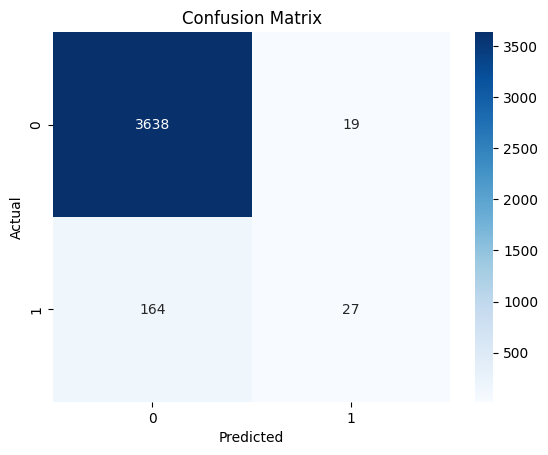

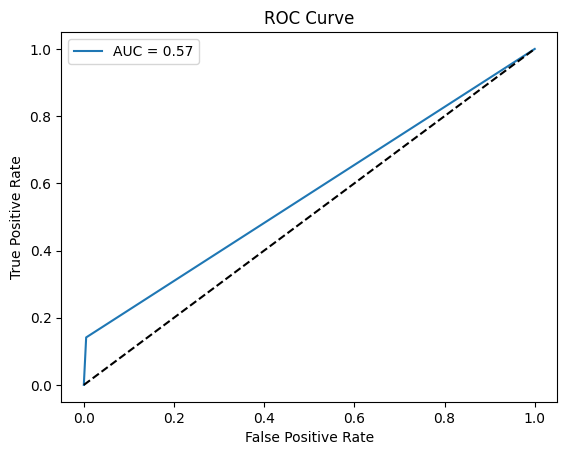

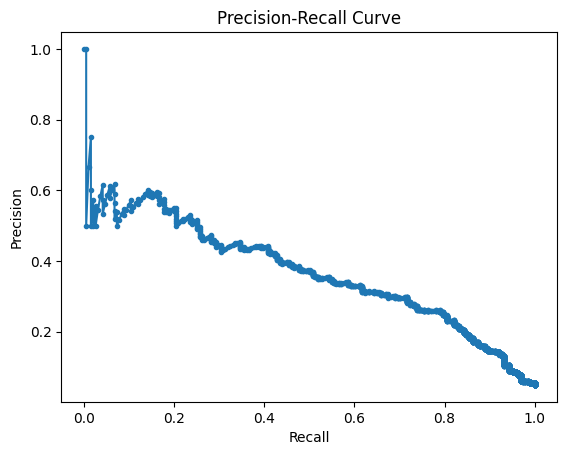

In [38]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, brier_score_loss

# Initial model training with Logistic Regression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_normalized , y_train)

y_pred_LR = LR_model.predict(X_test_normalized )
y_proba_LR = LR_model.predict_proba(X_test_normalized )[:, 1]

# Evaluate initial model
df_evaluate_LR_model = Evaluate_model('Logistic_Regression' , y_test , y_pred_LR, y_proba_LR)
classreport_LR_model = classification_model('Logistic_Regression' , y_test , y_pred_LR)
print(display(df_evaluate_LR_model))
print(classreport_LR_model) 

# Create data frame
df_classreport_LR_model = classification_report_to_dataframe(y_test, y_pred_LR)
df_confusionmetrix_LR_model = get_confusion_matrix_df(y_test, y_pred_LR)


# Plot
plot_confusion_matrix(y_test, y_pred_LR, title='Confusion Matrix')
plot_roc_curve(y_test, y_pred_LR, title='ROC Curve')
plot_precision_recall_curve(y_test, y_proba_LR, title='Precision-Recall Curve')



## **2. Decision Tree**

,Decission Tree
Accuracy,0.941008
Precision,0.395349
Recall,0.356021
F1 Score,0.374656
ROC AUC,0.663791
logloss,2.126276


None
The classification report for Decission Tree is :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3657
           1       0.40      0.36      0.37       191

    accuracy                           0.94      3848
   macro avg       0.68      0.66      0.67      3848
weighted avg       0.94      0.94      0.94      3848



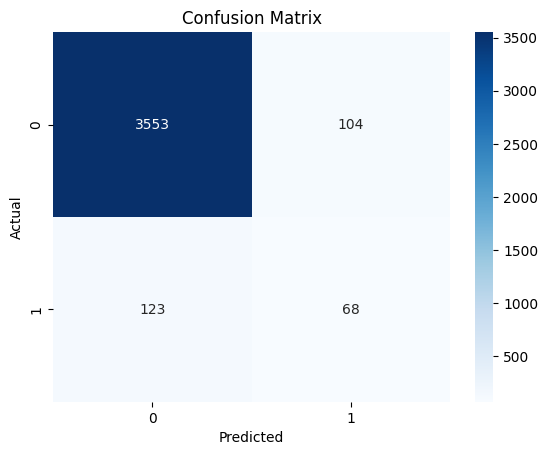

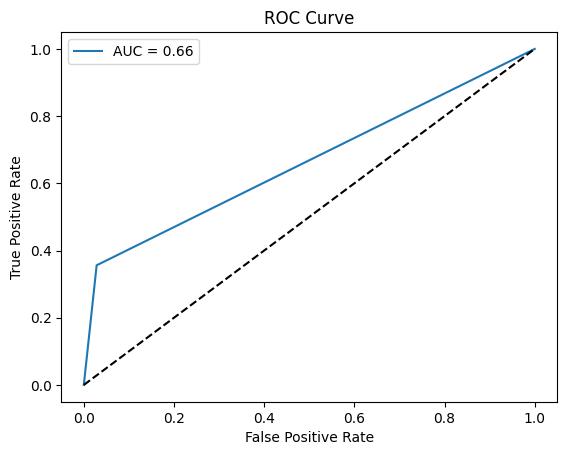

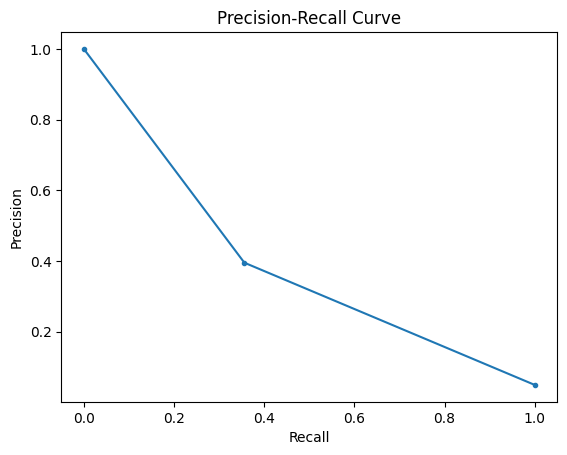

In [39]:
#Start with a simple model like Decision Tree
from sklearn.tree import DecisionTreeClassifier 


# Create and train the Decision Tree with Gini impurity
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train_normalized, y_train) 
y_pred_gini = dt_model.predict(X_test_normalized) 
y_prob_gini = dt_model.predict_proba(X_test_normalized)[:,1]


# Evaluate 
df_evaluate_DT_model = Evaluate_model('Decission Tree' , y_test , y_pred_gini,y_prob_gini)
print(display(df_evaluate_DT_model))
classreport_DT_model = classification_model('Decission Tree', y_test , y_pred_gini)
print(classreport_DT_model)


# Create data frame 
df_classreport_DT_model = classification_report_to_dataframe(y_test , y_pred_gini)
df_confusionmetrix_DT_model = get_confusion_matrix_df(y_test, y_pred_gini)


# plot evaluation
plot_confusion_matrix(y_test, y_pred_gini, title='Confusion Matrix')
plot_roc_curve(y_test, y_prob_gini, title='ROC Curve')
plot_precision_recall_curve(y_test, y_prob_gini, title='Precision-Recall Curve')



## **3. RandomForest Classifier**

,Rondom Forest
Accuracy,0.952963
Precision,0.631579
Recall,0.125654
F1 Score,0.209607
ROC AUC,0.922652
logloss,0.167322


None
The classification report for Rondom Forest is :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3657
           1       0.63      0.13      0.21       191

    accuracy                           0.95      3848
   macro avg       0.79      0.56      0.59      3848
weighted avg       0.94      0.95      0.94      3848



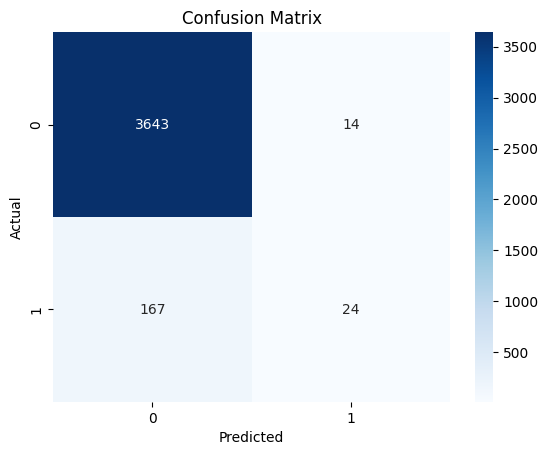

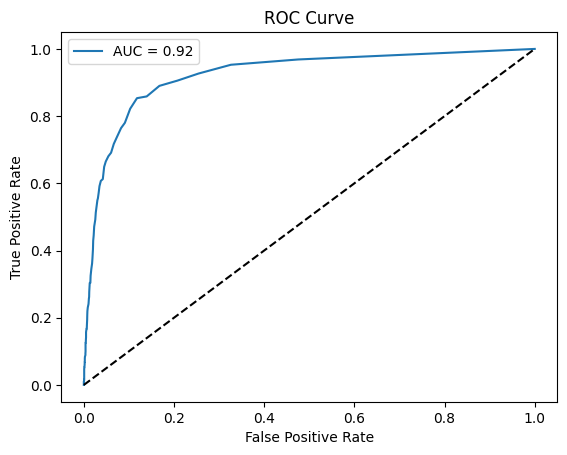

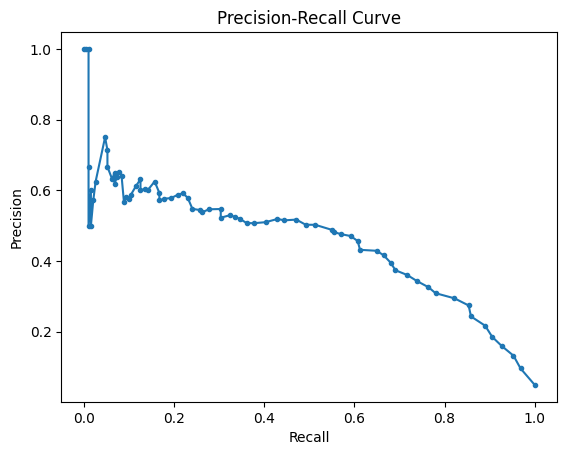

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
RF_model = RandomForestClassifier(random_state=42, oob_score=True)
RF_model.fit(X_train_normalized, y_train)
y_pred_RF = RF_model.predict(X_test_normalized)
y_prob_RF = RF_model.predict_proba(X_test_normalized)[:, 1]

# Evaluate the model
df_evaluate_RF_model = Evaluate_model('Rondom Forest' , y_test , y_pred_RF,y_prob_RF)
print(display(df_evaluate_RF_model))
classreport_RF_model = classification_model('Rondom Forest', y_test , y_pred_RF)
print(classreport_RF_model)

# Create Data Frame 
df_classreport_RF_model = classification_report_to_dataframe(y_test , y_pred_RF)
df_confusionmetrix_RF_model = get_confusion_matrix_df(y_test, y_pred_RF)

#  plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_RF, title='Confusion Matrix')
plot_roc_curve(y_test, y_prob_RF, title='ROC Curve')
plot_precision_recall_curve(y_test, y_prob_RF, title='Precision-Recall Curve')



## **4. GradientBoosting Classifier**

,GradientBoostingClassifier
Accuracy,0.951143
Precision,0.528302
Recall,0.146597
F1 Score,0.229508
ROC AUC,0.930095
logloss,0.125924


None
The classification report for GradientBoostingClassifier is :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3657
           1       0.53      0.15      0.23       191

    accuracy                           0.95      3848
   macro avg       0.74      0.57      0.60      3848
weighted avg       0.94      0.95      0.94      3848



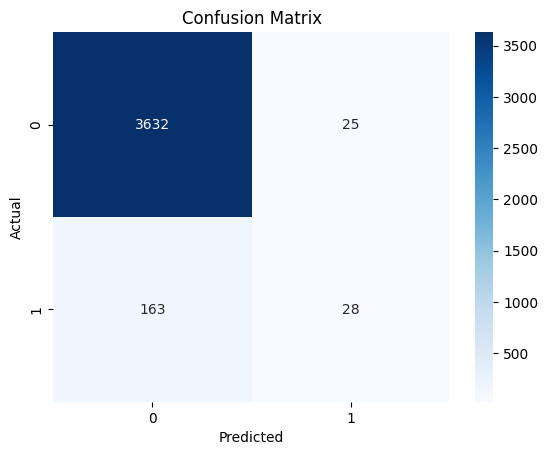

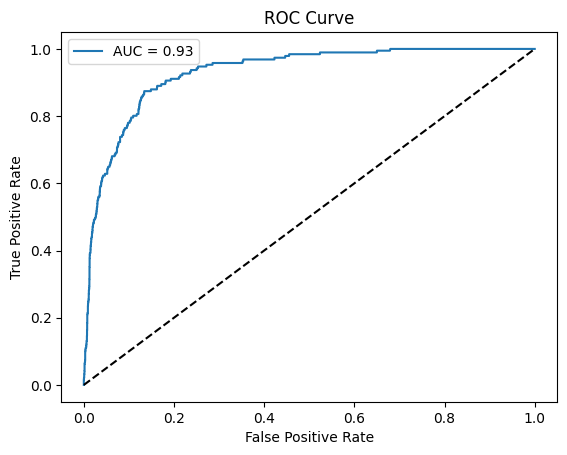

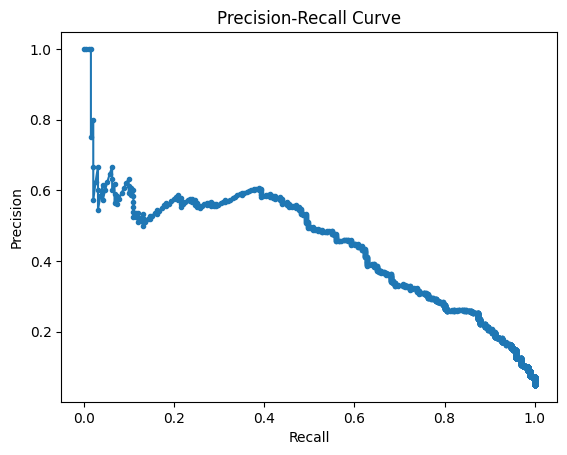

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Function to build the Gradient Boosting model
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train_normalized, y_train)
y_pred_GB = GB_model.predict(X_test_normalized)
y_prob_GB = GB_model.predict_proba(X_test_normalized)[:, 1]

# Evaluation
df_evaluate_GB_model = Evaluate_model('GradientBoostingClassifier' , y_test , y_pred_GB,y_prob_GB)
print(display(df_evaluate_GB_model))
classreport_GB_model = classification_model('GradientBoostingClassifier', y_test , y_pred_GB)
print(classreport_GB_model)

# Create Data Frame 
df_classreport_GB_model = classification_report_to_dataframe(y_test , y_pred_GB)
df_confusionmetrix_GB_model = get_confusion_matrix_df(y_test, y_pred_GB)

#  plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_GB, title='Confusion Matrix')
plot_roc_curve(y_test, y_prob_GB, title='ROC Curve')
plot_precision_recall_curve(y_test, y_prob_GB, title='Precision-Recall Curve')


## **5. Suport Vector Machine (SVM)**

,SuportVectorMachine
Accuracy,0.951663
Precision,0.619048
Recall,0.068063
F1 Score,0.122642
ROC AUC,0.828651
logloss,0.171002


None
The classification report for SuportVectorMachine is :
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3657
           1       0.62      0.07      0.12       191

    accuracy                           0.95      3848
   macro avg       0.79      0.53      0.55      3848
weighted avg       0.94      0.95      0.93      3848



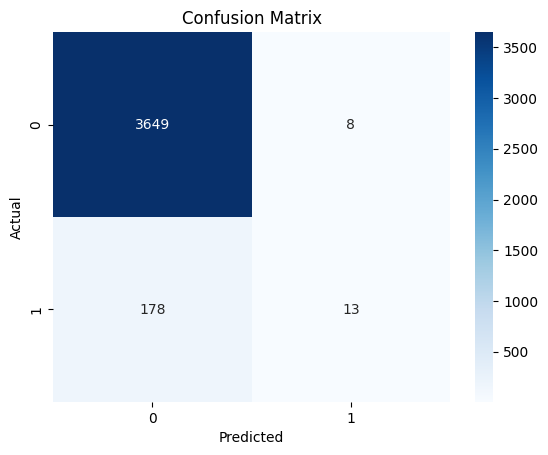

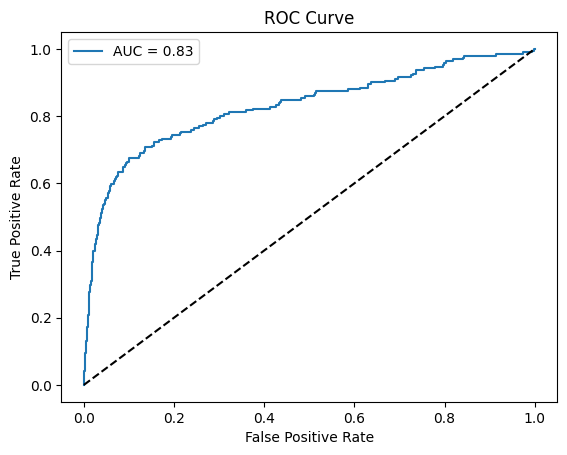

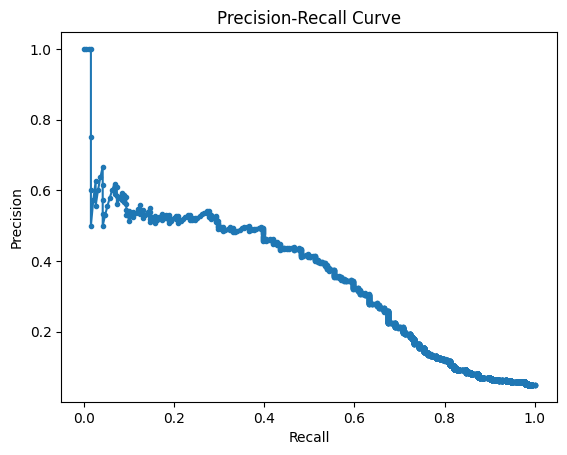

In [42]:
# Create the SVM Model
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

# Define a function to build the SVM model
SVM_model = SVC(probability=True)
SVM_model.fit(X_train_normalized, y_train)

# initial evaluate the model
y_pred_svm = SVM_model.predict(X_test_normalized)  # 'model' is now a defined parameter
y_prob_svm = SVM_model.predict_proba(X_test_normalized)[:, 1]

# Evaluation
df_evaluate_SVM_model = Evaluate_model('SuportVectorMachine' , y_test , y_pred_svm,y_prob_svm)
print(display(df_evaluate_SVM_model))
classreport_SVM_model = classification_model('SuportVectorMachine', y_test , y_pred_svm)
print(classreport_SVM_model)

# Create Data Frame
df_classreport_SVM_model = classification_report_to_dataframe(y_test , y_pred_svm)
df_confusionmetrix_SVM_model = get_confusion_matrix_df(y_test, y_pred_svm)

#  plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_svm, title='Confusion Matrix')
plot_roc_curve(y_test, y_prob_svm, title='ROC Curve')
plot_precision_recall_curve(y_test, y_prob_svm, title='Precision-Recall Curve')


## **6. k-nearest neighbors (KNN)**

,KNeighborsClassifier
Accuracy,0.949324
Precision,0.467742
Recall,0.151832
F1 Score,0.229249
ROC AUC,0.751123
logloss,0.835850


None
The classification report for KNeighborsClassifier is :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3657
           1       0.47      0.15      0.23       191

    accuracy                           0.95      3848
   macro avg       0.71      0.57      0.60      3848
weighted avg       0.93      0.95      0.94      3848



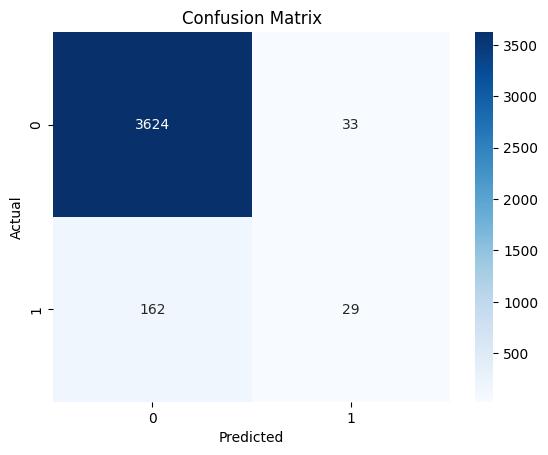

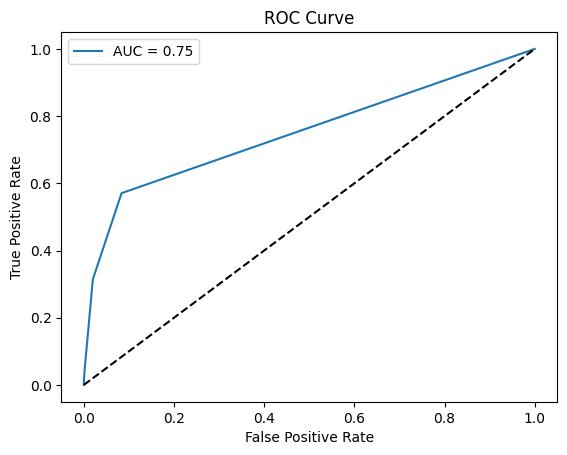

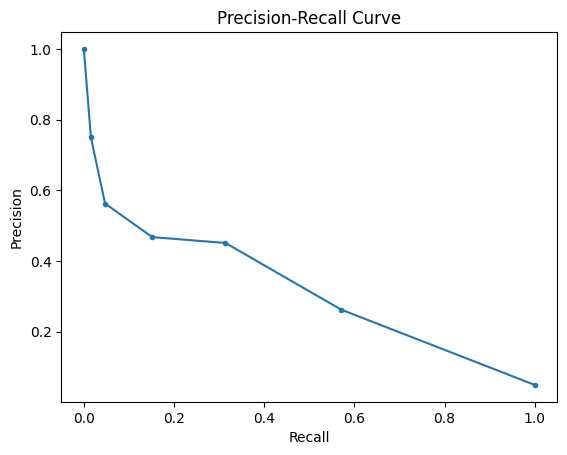

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Train a K-Neighbors Classifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_normalized, y_train)
y_pred_KNN = KNN_model.predict(X_test_normalized)
y_prob_KNN = KNN_model.predict_proba(X_test_normalized)[:, 1]

# Evaluation
df_evaluate_KNN_model = Evaluate_model('KNeighborsClassifier' , y_test , y_pred_KNN , y_prob_KNN)
print(display(df_evaluate_KNN_model))
classreport_KNN_model = classification_model('KNeighborsClassifier', y_test , y_pred_KNN)
print(classreport_KNN_model)

# Create Data Frame
df_classreport_KNN_model = classification_report_to_dataframe(y_test , y_pred_KNN)
df_confusionmetrix_KNN_model = get_confusion_matrix_df(y_test, y_pred_KNN)

#  plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_KNN, title='Confusion Matrix')
plot_roc_curve(y_test, y_prob_KNN, title='ROC Curve')
plot_precision_recall_curve(y_test, y_prob_KNN, title='Precision-Recall Curve')


## **7. Neural Network(NN)**

Epoch 1/50


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


481/481 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9330 - auc: 0.6451 - loss: 0.2236 - val_accuracy: 0.9522 - val_auc: 0.9101 - val_loss: 0.1331
Epoch 2/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9594 - auc: 0.9101 - loss: 0.1151 - val_accuracy: 0.9506 - val_auc: 0.9176 - val_loss: 0.1290
Epoch 3/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9608 - auc: 0.9239 - loss: 0.1081 - val_accuracy: 0.9509 - val_auc: 0.9180 - val_loss: 0.1275
Epoch 4/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9614 - auc: 0.9312 - loss: 0.1036 - val_accuracy: 0.9498 - val_auc: 0.9212 - val_loss: 0.1269
Epoch 5/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9632 - auc: 0.9366 - loss: 0.1000 - val_accuracy: 0.9496 - val_auc: 0.9232 - val_loss: 0.1267
Epoch 6/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9650 - auc: 0.9410 - loss: 0.0968 - val_accuracy: 0.9504 - val_auc: 0.9226 - val_loss: 0.1273
Epoch 7/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/ste

,NeuralNetwork
Accuracy,0.943867
Precision,0.418301
Recall,0.335079
F1 Score,0.372093
ROC AUC,0.873465
logloss,0.268349


None
The classification report for NeuralNetwork is :
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3657
           1       0.42      0.34      0.37       191

    accuracy                           0.94      3848
   macro avg       0.69      0.66      0.67      3848
weighted avg       0.94      0.94      0.94      3848



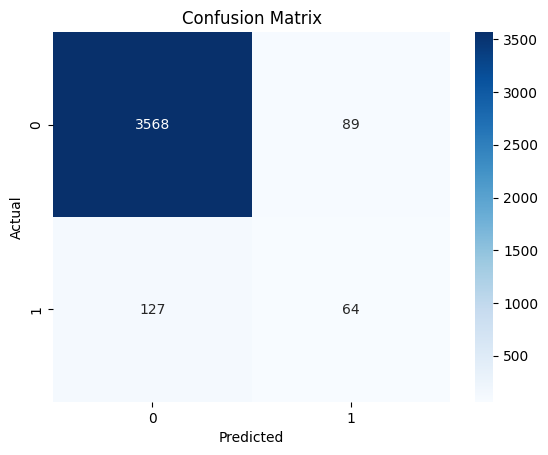

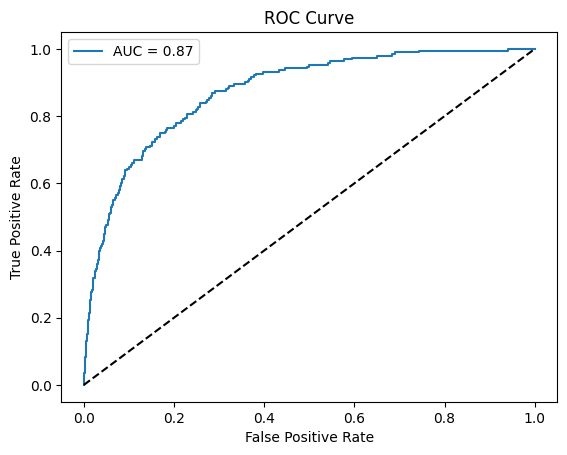

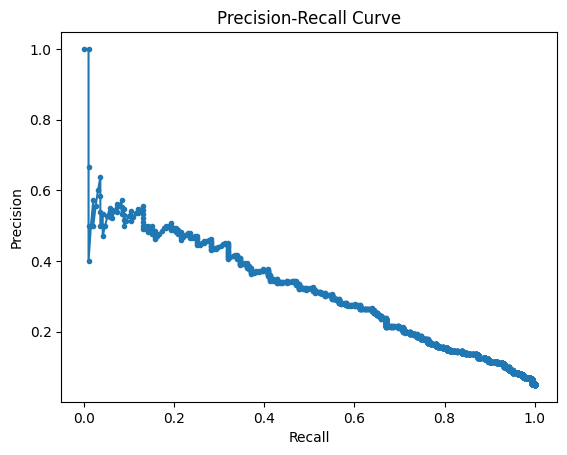

In [44]:
import tensorflow as tf

# Convert the data to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_normalized, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_normalized, y_test)).batch(32)

# Define the initial model
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
initial_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Train the model
initial_history = initial_model.fit(train_dataset, epochs=50, validation_data=test_dataset)

# Predict probabilities
y_prob_NN = initial_model.predict(X_test_normalized).flatten()
y_pred_NN = (y_prob_NN > 0.5).astype(int)


# Evaluation
df_evaluate_NN_model = Evaluate_model('NeuralNetwork' , y_test , y_pred_NN , y_prob_NN)
print(display(df_evaluate_NN_model))
classreport_NN_model = classification_model('NeuralNetwork', y_test , y_pred_NN)
print(classreport_NN_model)

# Create Data Frame
df_classreport_NN_model = classification_report_to_dataframe(y_test , y_pred_NN)
df_confusionmetrix_NN_model = get_confusion_matrix_df(y_test, y_pred_NN)

#  plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_NN, title='Confusion Matrix')
plot_roc_curve(y_test, y_prob_NN, title='ROC Curve')
plot_precision_recall_curve(y_test, y_prob_NN, title='Precision-Recall Curve')


# **Step 7 :Compare Performance Analysis**


## Compare Initial models

In [45]:
# Data frame of initial Evaluation of models
df_metrics_comparison = pd.concat([df_evaluate_LR_model,df_evaluate_DT_model,
                                   df_evaluate_RF_model,df_evaluate_GB_model,
                                   df_evaluate_SVM_model,df_evaluate_KNN_model,
                                   df_evaluate_NN_model] , axis = 1)
df_metrics_comparison

,Logistic_Regression,Decission Tree,Rondom Forest,GradientBoostingClassifier,SuportVectorMachine,KNeighborsClassifier,NeuralNetwork
Accuracy,0.952443,0.941008,0.952963,0.951143,0.951663,0.949324,0.943867
Precision,0.586957,0.395349,0.631579,0.528302,0.619048,0.467742,0.418301
Recall,0.141361,0.356021,0.125654,0.146597,0.068063,0.151832,0.335079
F1 Score,0.227848,0.374656,0.209607,0.229508,0.122642,0.229249,0.372093
ROC AUC,0.894891,0.663791,0.922652,0.930095,0.828651,0.751123,0.873465
logloss,0.137404,2.126276,0.167322,0.125924,0.171002,0.835850,0.268349


In [46]:
# Data frame of classification reports of Models

models = {
    'LR': df_classreport_LR_model,
    'DT': df_classreport_DT_model,
    'RF': df_classreport_RF_model,
    'GB': df_classreport_GB_model,
    'SVM': df_classreport_SVM_model,
    'KNN': df_classreport_KNN_model,
    'NN': df_classreport_NN_model
}

classification_report = pd.DataFrame()

for model_name, classreport_df in models.items():
    classreport_df = classreport_df.copy()
    classreport_df['model'] = model_name
    classreport_df['class'] = classreport_df.index
    classreport_df = classreport_df[classreport_df['class'].isin(['0', '1'])]
    classification_report = pd.concat([classification_report, classreport_df], ignore_index=True)

classification_report_pivot = classification_report.pivot(index='model', columns='class', values=['precision', 'recall', 'f1-score', 'support'])
classification_report_pivot.columns = [f'{col[0]}_{col[1]}' for col in classification_report_pivot.columns]
classification_report_pivot = classification_report_pivot.sort_index()
df_classification_report_pivot = classification_report_pivot.fillna(0)

print("\nClassification Report:")
print(df_classification_report_pivot)




Classification Report:
       precision_0  precision_1  recall_0  recall_1  f1-score_0  f1-score_1  \
model                                                                         
DT        0.966540     0.395349  0.971561  0.356021    0.969044    0.374656   
GB        0.957049     0.528302  0.993164  0.146597    0.974772    0.229508   
KNN       0.957211     0.467742  0.990976  0.151832    0.973801    0.229249   
LR        0.956865     0.586957  0.994804  0.141361    0.975466    0.227848   
NN        0.965629     0.418301  0.975663  0.335079    0.970620    0.372093   
RF        0.956168     0.631579  0.996172  0.125654    0.975760    0.209607   
SVM       0.953488     0.619048  0.997812  0.068063    0.975147    0.122642   

       support_0  support_1  
model                        
DT        3657.0      191.0  
GB        3657.0      191.0  
KNN       3657.0      191.0  
LR        3657.0      191.0  
NN        3657.0      191.0  
RF        3657.0      191.0  
SVM       3657.0      19

In [47]:
# Data frame of Confusion matrix of models
models = ['LR', 'DT', 'RF', 'GB', 'SVM', 'KNN', 'NN']

def extract_confusion_matrix(df):
    tn, fp, fn, tp = df.values.ravel()
    return tn, fp, fn, tp

data = []
for model in models:
    confusionmatrix_df = globals()[f'df_confusionmetrix_{model}_model']
    tn, fp, fn, tp = extract_confusion_matrix(confusionmatrix_df)
    
    data.append({
        'Model': model,
        'True Negative': tn,
        'False Positive': fp,
        'False Negative': fn,
        'True Positive': tp
    })

df_confusion_comparison = pd.DataFrame(data)

print("Overall Confusion Metrix Comparison:")
print(df_confusion_comparison)


Overall Confusion Metrix Comparison:
  Model  True Negative  False Positive  False Negative  True Positive
0    LR           3638              19             164             27
1    DT           3553             104             123             68
2    RF           3643              14             167             24
3    GB           3632              25             163             28
4   SVM           3649               8             178             13
5   KNN           3624              33             162             29
6    NN           3568              89             127             64


Based on the provided data, **Random Forest** is considered the top model:
Random Forest is considered the best model for several key reasons:

1- Highest Overall Performance Metrics:
* Accuracy: 0.952963 (95.3%) - highest among all models
* Precision: 0.631579 (63.2%) - highest precision score
* ROC-AUC: 0.922652 (92.3%) - highest ROC-AUC score


2- Balanced Performance:
* It maintains good performance across all metrics without sacrificing one metric for another
* Shows good generalization ability with the highest ROC-AUC score
* Balances between precision and sensitivity better than other models


3- Handling Class Imbalance:
* Despite the severe class imbalance (3657 vs 191 samples)
* Maintains high precision (0.631579) without overfitting to the majority class
* Better at handling the minority class compared to SVM (0.619048) and Logistic Regression (0.586957)


4- Practical Advantages:
* Lower risk of overfitting due to ensemble nature
* Better at handling non-linear relationships in data
* Can handle both numerical and categorical features well
* Provides feature importance rankings


Among the top three models, **Logistic Regression and Gradient Boosting** offer complementary strengths following Random Forest. Logistic Regression achieves remarkable accuracy (95.24%) with the advantages of being simpler to implement and more interpretable, making it ideal for scenarios where computational efficiency is crucial. Meanwhile, Gradient Boosting shows exceptional performance with the highest ROC-AUC score (0.930120) and lowest log loss (0.125914), excelling in handling complex patterns through sequential learning, though requiring more computational resources. Both models demonstrate strong predictive capabilities while serving different needs - Logistic Regression for efficiency and interpretability, and Gradient Boosting for prediction confidence and handling complex patterns. This makes each model suitable for different business scenarios depending on whether the priority is ease of implementation and interpretation (Logistic Regression) or prediction accuracy and confidence (Gradient Boosting).

Blending these three models creates a robust and comprehensive business solution. Random Forest provides reliable base predictions, Gradient Boosting offers excellent probability estimates and ranking capabilities, while Logistic Regression adds interpretability and quick insights. This combination helps balance accuracy with explainability, making it ideal for business decision-making. The ensemble approach reduces the risk of individual model errors while providing multiple perspectives on predictions. For business implementation, you could use weighted voting or averaging based on each model's strengths, with Random Forest given slightly higher weight (40%) and the others equally weighted (30% each). This approach provides both accurate predictions and clear business insights, making it easier to justify decisions to stakeholders while maintaining high performance.

# **Step 8: Model Tuning and Improvment**

### 1. Tuning Best Models 

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

class SampleWeightComputer:
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if y is not None:
            sample_weight = compute_sample_weight('balanced', y)
            return X, y, sample_weight
        return X

def create_pipeline(model, use_sample_weight=False):
    steps = [
        ('scaler', StandardScaler()),
        ('sampler', SMOTE(random_state=42))
    ]
    if use_sample_weight:
        steps.append(('weight_computer', SampleWeightComputer()))
    steps.append(('classifier', model))
    return Pipeline(steps)

def optimize_model(model, param_grid, X, y, use_sample_weight=False):
    pipeline = create_pipeline(model, use_sample_weight)
    grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(3), 
                               scoring='f1', n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_estimator_

def evaluate_model(model_name, y_test, y_pred, y_pred_proba):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'logloss': log_loss(y_test, y_pred_proba)
    }
    return pd.Series(metrics, name=model_name)

def select_best_model(results, metric):
    if metric in results.index:
        return results.loc[metric].idxmax()
    matching_rows = results.index[results.index.str.lower().str.contains(metric.lower())]
    if matching_rows.empty:
        raise ValueError(f"Metric '{metric}' not found in results. Available metrics are: {', '.join(results.index)}")
    return results.loc[matching_rows[0]].idxmax()

# Define parameter grids for each model
param_grids = {
    'Optimized Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    'Optimized Gradient Boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.1],
        'classifier__max_depth': [3, 5]
    },
    'Optimized Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2, 5]
    }
}

# Define models
models = {
    'Optimized Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Optimized Gradient Boosting': GradientBoostingClassifier(),
    'Optimized Random Forest': RandomForestClassifier(class_weight='balanced')
}

def optimized_df(x_train, y_train, x_test, y_test):
    results_optimized_df = pd.DataFrame()

    for name, model in models.items():
        use_sample_weight = name == 'Optimized Gradient Boosting'
        best_model = optimize_model(model, param_grids[name], x_train, y_train, use_sample_weight)
        
        y_pred = best_model.predict(x_test)
        y_pred_proba = best_model.predict_proba(x_test)[:, 1]
        model_results = evaluate_model(name, y_test, y_pred, y_pred_proba)
        results_optimized_df = pd.concat([results_optimized_df, model_results], axis=1)

    print("\nOptimized Model Performance Metrics:")
    print(results_optimized_df)

    metrics_to_check = ['Accuracy', 'F1 Score', 'ROC AUC', 'Precision', 'Recall','logloss']
    best_models = {}
    for metric in metrics_to_check:
        try:
            best_model = select_best_model(results_optimized_df, metric)
            print(f"\nBest Model based on {metric}: {best_model}")
            matching_metric = next(m for m in results_optimized_df.index if metric.lower() in m.lower())
            print(f"{matching_metric} Score: {results_optimized_df.loc[matching_metric, best_model]:.4f}")
            best_models[metric] = {'model': best_model, 'score': results_optimized_df.loc[matching_metric, best_model]}
        except:
            pass
    
    return results_optimized_df , best_models


results_optimized_df, best_models = optimized_df(x_train, y_train, x_test, y_test)

# Optimizing  Specific model
optimized_RF = optimize_model(models['Optimized Random Forest'], param_grids['Optimized Random Forest'], x_train, y_train)
optimized_GB = optimize_model(models['Optimized Gradient Boosting'], param_grids['Optimized Gradient Boosting'], x_train, y_train, use_sample_weight=True)


Optimized Model Performance Metrics:
           Optimized Logistic Regression  Optimized Gradient Boosting  \
Accuracy                        0.846933                     0.949324   
Precision                       0.218927                     0.489691   
Recall                          0.811518                     0.497382   
F1 Score                        0.344828                     0.493506   
ROC AUC                         0.894176                     0.918815   
logloss                         0.368184                     0.144990   

           Optimized Random Forest  
Accuracy                  0.950884  
Precision                 0.508929  
Recall                    0.298429  
F1 Score                  0.376238  
ROC AUC                   0.928503  
logloss                   0.136003  

Best Model based on Accuracy: Optimized Random Forest
Accuracy Score: 0.9509

Best Model based on F1 Score: Optimized Gradient Boosting
F1 Score Score: 0.4935

Best Model based on ROC AUC: O

In [50]:
# Compare Initial Model and Optimized Model
compaire_metrics = pd.concat([df_metrics_comparison[['Logistic_Regression' , 'GradientBoostingClassifier' , 'Rondom Forest']] ,results_optimized_df] , axis = 1)
compaire_metrics

,Logistic_Regression,GradientBoostingClassifier,Rondom Forest,Optimized Logistic Regression,Optimized Gradient Boosting,Optimized Random Forest
Accuracy,0.952443,0.951143,0.952963,0.846933,0.949324,0.950884
Precision,0.586957,0.528302,0.631579,0.218927,0.489691,0.508929
Recall,0.141361,0.146597,0.125654,0.811518,0.497382,0.298429
F1 Score,0.227848,0.229508,0.209607,0.344828,0.493506,0.376238
ROC AUC,0.894891,0.930095,0.922652,0.894176,0.918815,0.928503
logloss,0.137404,0.125924,0.167322,0.368184,0.144990,0.136003


Based on the performance metrics, creating an ensemble model using **Random Forest and Gradient Boosting** would likely yield the best results. Because:

1. Complementary strengths
2. Similar performance levels
3. Different algorithmic approaches
4. Consistent improvement after optimization

### 2. Ensemble Model Based on Tuning Models

In [54]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from joblib import Parallel, delayed

def create_ensemble_models(rf_model, gb_model):
    return {
        'Voting Classifier': VotingClassifier(
            estimators=[('rf', rf_model), ('gb', gb_model)],
            voting='soft', n_jobs=-1
        ),
        'AdaBoost': AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=1),
            n_estimators=100,
            random_state=42
        ),
        'Stacking': StackingClassifier(
            estimators=[('rf', rf_model), ('gb', gb_model)],
            final_estimator=LogisticRegression(random_state=42, max_iter=1000),
            cv=3
        )
    }

def evaluate_model(model, X_train, X_test, y_train, y_test):
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=3, scoring='f1_weighted', n_jobs=-1))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    return {
        'CV Score': cv_score,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc_score(y_test, y_pred_proba, average='weighted')
    }

def evaluate_ensemble_methods(X_train, X_test, y_train, y_test, rf_model, gb_model):
    ensemble_models = create_ensemble_models(rf_model, gb_model)
    
    results = Parallel(n_jobs=-1)(
        delayed(evaluate_model)(model, X_train, X_test, y_train, y_test)
        for model in ensemble_models.values()
    )
    
    return dict(zip(ensemble_models.keys(), results))

def create_comparison_dataframe(results):
    return pd.DataFrame(results).round(4)

def ensemble_df(X_train, X_test, y_train, y_test, rf_model, gb_model):
    results = evaluate_ensemble_methods(X_train, X_test, y_train, y_test, rf_model, gb_model)
    df_comparison_ensemble = create_comparison_dataframe(results)
    
    print("\nComparison of Ensemble Models:")
    print(df_comparison_ensemble.to_string())
    
    return results, df_comparison_ensemble

# Usage
results, df_comparison_ensemble = ensemble_df(
    X_train_normalized, X_test_normalized, y_train, y_test,
    optimized_RF, optimized_GB
)


Comparison of Ensemble Models:
           Voting Classifier  AdaBoost  Stacking
CV Score              0.9539    0.9478    0.9509
Accuracy              0.9543    0.9488    0.9532
Precision             0.9497    0.9328    0.9421
Recall                0.9543    0.9488    0.9532
F1 Score              0.9516    0.9371    0.9443
ROC AUC               0.9314    0.8926    0.9302


### 3.Optimized Ensemble Model

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from joblib import Parallel, delayed

def tune_voting_classifier(X_train, y_train, rf_model, gb_model):
    param_dist = {
        'weights': [[1, 1], [1, 2], [2, 1]],
        'voting': ['soft', 'hard']
    }
    
    voting_clf = VotingClassifier(
        estimators=[('rf', rf_model), ('gb', gb_model)]
    )
    
    random_search = RandomizedSearchCV(voting_clf, param_distributions=param_dist, 
                                       n_iter=6, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    
    return random_search.best_estimator_

def tune_adaboost(X_train, y_train):
    param_dist = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
    }
    
    ada_clf = AdaBoostClassifier(random_state=42)
    
    random_search = RandomizedSearchCV(ada_clf, param_distributions=param_dist, 
                                       n_iter=9, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    
    return random_search.best_estimator_

def tune_stacking(X_train, y_train, rf_model, gb_model):
    param_dist = {
        'final_estimator': [LogisticRegression(random_state=42, max_iter=1000)],
        'cv': [3],
        'stack_method': ['auto', 'predict_proba']
    }
    
    stacking_clf = StackingClassifier(
        estimators=[('rf', rf_model), ('gb', gb_model)]
    )
    
    random_search = RandomizedSearchCV(stacking_clf, param_distributions=param_dist, 
                                       n_iter=2, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    
    return random_search.best_estimator_

def evaluate_model(model, X_train, X_test, y_train, y_test):
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_weighted', n_jobs=-1)
    cv_score = np.mean(cv_scores)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    return {
        'CV Score': cv_score,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc_score(y_test, y_pred_proba, average='weighted')
    }

def evaluate_ensemble_methods(X_train, X_test, y_train, y_test, rf_model, gb_model):
    ensemble_models = {
        'Tuned Voting Classifier': tune_voting_classifier,
        'Tuned AdaBoost': tune_adaboost,
        'Tuned Stacking': tune_stacking
    }
    
    results = {}
    optimized_models = {}
    
    def process_model(name, tune_func):
        if name == 'Tuned AdaBoost':
            model = tune_func(X_train, y_train)
        else:
            model = tune_func(X_train, y_train, rf_model, gb_model)
        return name, model, evaluate_model(model, X_train, X_test, y_train, y_test)
    
    with Parallel(n_jobs=-1) as parallel:
        model_results = parallel(delayed(process_model)(name, tune_func)
                                 for name, tune_func in ensemble_models.items())
    
    for name, model, result in model_results:
        results[name] = result
        optimized_models[name] = model
    
    return results, optimized_models

def create_comparison_dataframe(results):
    return pd.DataFrame(results).round(4)

def optimized_ensemble_df(X_train_normalized, X_test_normalized, y_train, y_test, rf_model, gb_model):
    results_optimized, optimized_models = evaluate_ensemble_methods(X_train_normalized, X_test_normalized, y_train, y_test, rf_model, gb_model)
    df_optimized_ensemble = create_comparison_dataframe(results_optimized)
    
    print("\nComparison of Optimized Ensemble Models:")
    print(df_optimized_ensemble.to_string())
    
    best_model_name = df_optimized_ensemble.loc['F1 Score'].idxmax()
    best_model = optimized_models[best_model_name]
    
    print(f"\nBest Model: {best_model_name}")
    print(f"Best F1 Score: {df_optimized_ensemble.loc['F1 Score', best_model_name]}")
    
    return results_optimized, df_optimized_ensemble, best_model, best_model_name, optimized_models

# Usage
results_optimized, df_optimized_ensemble, best_model, best_model_name, optimized_models = optimized_ensemble_df(
    X_train_normalized, X_test_normalized, y_train, y_test,
    optimized_RF, optimized_GB
)


Comparison of Optimized Ensemble Models:
           Tuned Voting Classifier  Tuned AdaBoost  Tuned Stacking
CV Score                    0.9544          0.9516          0.9503
Accuracy                    0.9519          0.9498          0.9535
Precision                   0.9487          0.9375          0.9426
Recall                      0.9519          0.9498          0.9535
F1 Score                    0.9502          0.9412          0.9448
ROC AUC                     0.9298          0.8959          0.9302

Best Model: Tuned Voting Classifier
Best F1 Score: 0.9502


# **Step 9 : Insight based on Final Model**

##### Compare Ensemble Models

In [56]:
# Compare Optimized individual Models and Optimized Ensembles 
Final_Result = pd.concat([df_comparison_ensemble,df_optimized_ensemble], axis = 1)
Final_Result

,Voting Classifier,AdaBoost,Stacking,Tuned Voting Classifier,Tuned AdaBoost,Tuned Stacking
CV Score,0.9539,0.9478,0.9509,0.9544,0.9516,0.9503
Accuracy,0.9543,0.9488,0.9532,0.9519,0.9498,0.9535
Precision,0.9497,0.9328,0.9421,0.9487,0.9375,0.9426
Recall,0.9543,0.9488,0.9532,0.9519,0.9498,0.9535
F1 Score,0.9516,0.9371,0.9443,0.9502,0.9412,0.9448
ROC AUC,0.9314,0.8926,0.9302,0.9298,0.8959,0.9302


**Best overall model:**

For business insights, the **Voting Classifier** is recommended because it:

* Shows the most consistent performance
* Maintains high accuracy before and after tuning
* Provides the best balance of precision and recall
* Offers more reliable probability estimates
* Better handles different business scenarios

This makes it the most reliable choice for:

* Business decision-making
* Risk assessment
* Customer predictions
* Strategic planning
* Performance monitoring

The stability and consistency of the Voting Classifier make it particularly valuable for business applications where reliable and interpretable predictions are crucial for decision-making.

### Feature importance

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

def analyze_feature_importance(model, X, y, final_df, n_repeats=2):
 
    # Get the actual column names from final_df
    feature_names = final_df.columns.tolist()
    
    # Create mapping between feature indices and actual names
    feature_mapping = {
        f'Feature_{i}': name 
        for i, name in enumerate(feature_names)
    }
    
    # Calculate permutation importance
    perm_importance = permutation_importance(
        model, X, y,
        n_repeats=n_repeats,
        random_state=42,
        n_jobs=-1
    )
    
    # Create DataFrame with results using actual column names
    importance_df = pd.DataFrame({
        'feature_code': [f'Feature_{i}' for i in range(X.shape[1])],
        'feature_name': [feature_mapping[f'Feature_{i}'] for i in range(X.shape[1])],
        'importance': perm_importance.importances_mean,
        'std': perm_importance.importances_std
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('importance', ascending=False)
    
    
    # Calculate statistics
    importance_stats = {
        'mean_importance': importance_df['importance'].mean(),
        'median_importance': importance_df['importance'].median(),
        'std_importance': importance_df['importance'].std()
    }
    
    importance_results = {
        'importance_df': importance_df,
        'stats': importance_stats,
        'raw_importance': perm_importance,
        'feature_mapping': feature_mapping
    }
    return importance_results 



In [ ]:
# After finding the best model
importance_results = analyze_feature_importance(
    best_model,
    X_train_normalized,
    y_train,
    final_df  # original DataFrame with actual column names
)

feature_importance_df = importance_results['importance_df']
print(feature_importance_df.head(15))

   feature_code      feature_name  importance       std
5     Feature_5               day    0.027094  0.000390
31   Feature_31         month_apr    0.019654  0.000162
6     Feature_6          duration    0.018030  0.000682
3     Feature_3           housing    0.015171  0.000097
35   Feature_35         month_jan    0.010493  0.000032
7     Feature_7          campaign    0.007829  0.000747
39   Feature_39         month_may    0.006985  0.000357
2     Feature_2           balance    0.005978  0.000195
33   Feature_33         month_dec    0.005653  0.000195
34   Feature_34         month_feb    0.005295  0.000162
11   Feature_11     contact_known    0.004938  0.000520
0     Feature_0               age    0.004646  0.000097
25   Feature_25  marital_divorced    0.002956  0.000162
26   Feature_26   marital_married    0.002339  0.000000
37   Feature_37         month_jun    0.002014  0.000065


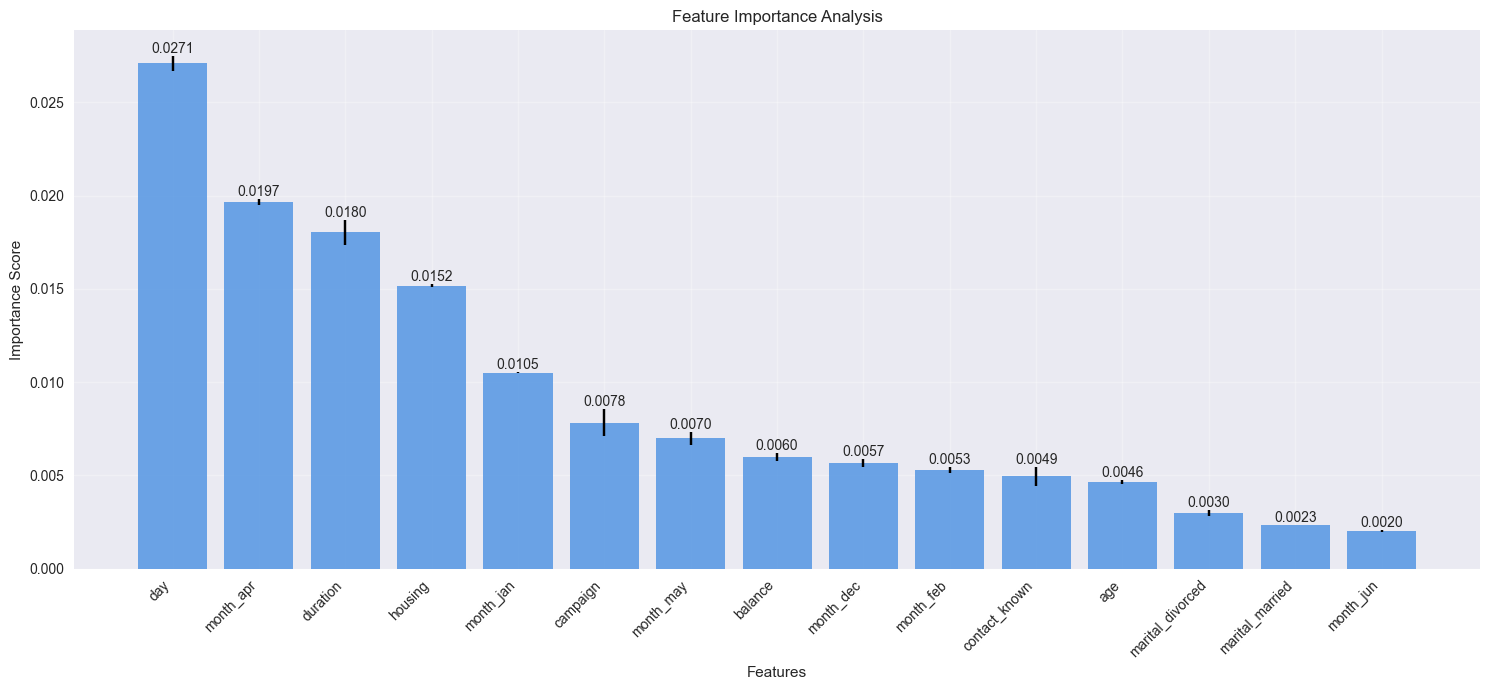

In [185]:
def plot_feature_importance(importance_results):
   
    df = importance_results
    top_n = min(15, len(df))
    top_features = df.head(top_n)
    
    plt.figure(figsize=(15, 7))
    
    # Create bar plot
    bars = plt.bar(
        range(top_n),
        top_features['importance'],
        yerr=top_features['std'],
        capsize=5,
        alpha=0.8,
        color='#4A90E2'
    )
    
    # Add value labels
    for idx, rect in enumerate(bars):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 
                height + top_features['std'].iloc[idx],
                f'{height:.4f}',
                ha='center', va='bottom', rotation=0)
    
    plt.xticks(range(top_n), top_features['feature_name'], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance Analysis')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# Plot the results
plot_feature_importance(feature_importance_df)

### Decision Boundaries (for top 2 features)

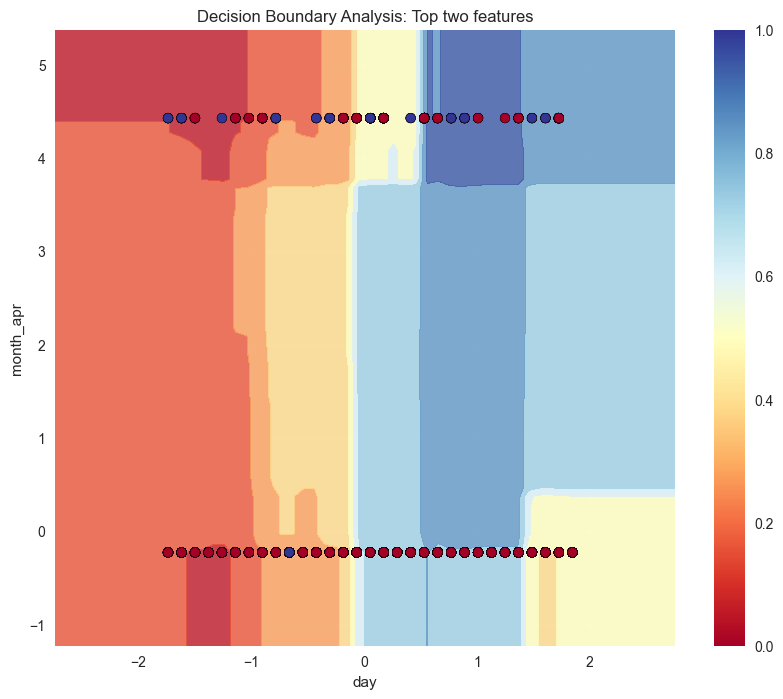

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundary(model, X, y, feature_importance_df, feature_names, resolution=0.1):
    # Get the top 2 important features
    top_2_features = feature_importance_df['feature_name'].iloc[:2].tolist()
    
    # Find the indices of the top 2 features
    feature_indices = [feature_names.index(feature) for feature in top_2_features]
    
    # Extract the data for the top 2 features
    if isinstance(X, pd.DataFrame):
        X_plot = X[top_2_features].values
    else:  # Assuming it's a numpy array
        X_plot = X[:, feature_indices]
    
    # Create a mesh grid
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Prepare the mesh grid data
    if isinstance(X, pd.DataFrame):
        mesh_data = X.copy()
        mesh_data[top_2_features[0]] = xx.ravel()
        mesh_data[top_2_features[1]] = yy.ravel()
    else:
        mesh_data = np.tile(X[0], (xx.ravel().shape[0], 1))
        mesh_data[:, feature_indices[0]] = xx.ravel()
        mesh_data[:, feature_indices[1]] = yy.ravel()
    
    # Make predictions on the mesh grid
    if hasattr(model, 'predict_proba'):
        Z = model.predict_proba(mesh_data)[:, 1]
    else:
        Z = model.predict(mesh_data)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel(top_2_features[0])
    plt.ylabel(top_2_features[1])
    plt.title('Decision Boundary Analysis: Top two features')
    plt.colorbar(scatter)
    plt.show()

# Usage
feature_names = x_train.columns.tolist()  # Make sure this is defined
plot_decision_boundary(best_model, X_train_normalized, y_train, feature_importance_df, feature_names, resolution=0.1)

**Decision Boundary Analysis**

1- Data Distribution:

* Red dots represent customers who didn't subscribe
* Blue dots represent customers who did subscribe
* The sparse distribution of dots suggests limited combinations of days and months in the data


2- Decision Regions:
* Clear decision boundaries exist, creating distinct regions where customers are more/less likely to subscribe.
* Strong blue regions (high probability of subscription) appear in the upper right quadrant
* Red regions (low probability) dominate the left side of the plot
* The color scale on the right shows probability from 0.0 (dark red) to 1.0 (dark blue)
* Clear vertical bands showing probability transitions
* X Axis(day) :  Values around 0 represent the middle of the month, while negative values are earlier days and positive values are later days
* Y Axis(month Apr) : The discrete values (0 and around 4) suggest binary classification for April vs non-April months



3- Pattern Analysis:
* There appears to be a "sweet spot" for successful subscriptions in the middle of the month
* The beginning and end of the month show lower probability of successful subscriptions
* The decision boundary shows clear vertical bands of probability changes
* The month of April (represented by month_aug) seems to have specific patterns at different times of the month


4- Business Implications:
* Marketing calls might be more successful during the middle of the month
* The timing of contact during the month appears to be more influential than whether it's early or late August
* There are clear temporal patterns that could be used to optimize contact timing


## Business Insight ## 

1- Customer Contact Strategy:

* Develop time-optimized contact strategies based on probability zones
* Consider multiple contact attempts during high-probability periods
* Create different scripts or approaches for high vs. low probability time periods
* Train call center staff on timing-specific approaches


2- Resource Optimization:

* Implement dynamic staffing models aligned with probability patterns
* Focus experienced staff during high-probability periods
* Use lower-probability periods for training and skill development
* Consider cost-effectiveness of contacts during different probability zones


3- Campaign Design:

* Structure campaign duration to maximize exposure during optimal periods
* Design special offers or incentives for low-probability periods to improve conversion
* Develop different value propositions for different temporal segments
* Create backup strategies for when high-probability slots are fully utilized


4- Performance Metrics:

* Develop time-sensitive KPIs to track success rates
* Compare conversion rates across different probability zones
* Monitor cost per acquisition based on contact timing
* Track long-term customer value against initial contact timing


5- Process Improvements:

* Use insights to refine customer segmentation
* Develop predictive models incorporating temporal patterns
* Create automated scheduling systems based on probability patterns
* Implement real-time monitoring of conversion rates


6- Risk Management:

* Balance resource allocation across different probability zones
* Develop contingency plans for peak contact periods
* Monitor and adjust for seasonal variations
* Create risk mitigation strategies for low-probability periods


7- Long-term Strategic Planning:

* Use insights for future campaign planning
* Develop year-round contact strategies
* Plan resource capacity based on probability patterns
* Create training programs aligned with temporal success patterns


8- Cross-selling Opportunities:

* Identify optimal timing for different product offerings
* Develop product bundles suitable for different probability zones
* Create targeted offers based on temporal success patterns
* Design retention strategies based on initial contact timing

These insights can help in developing a more sophisticated and effective marketing approach while optimizing resource utilization and improving overall campaign success rates.


## Recommensdaions
 
This visualization suggests that the day of the month could be a significant factor in determining the success of marketing campaigns, with mid-month contacts showing higher probability of success.
it's recommended to focus marketing efforts during periods with higher probability zones (shown in blue regions), particularly during standardized mid-month periods. Resource allocation should be adjusted to prioritize these high-probability time slots while reducing efforts in low-probability periods (red regions). The clear temporal patterns suggest implementing a time-based targeting strategy, with call center staffing aligned to these optimal periods. Additionally, continuous monitoring and validation of success rates across different probability zones would help refine and improve campaign effectiveness over time. This data-driven approach to campaign timing could significantly enhance subscription rates while optimizing resource utilization.

# **Step 10 : Data Organization For Import Power BI**

In [190]:
# Create unique customer number column
new_bank_data['customer_id'] = np.random.randint(10000, 99999, size=len(new_bank_data))
new_bank_data['customer_id'] = pd.Series(new_bank_data['customer_id'].unique()).sample(n=len(new_bank_data), replace = True).values
columns = new_bank_data.columns.tolist()
columns = ['customer_id'] + [col for col in columns if col != 'customer_id']
new_bank_data = new_bank_data[columns]
new_bank_data.to_csv('new_bank_data.csv', index = False)

In [192]:
# create Evaluation File 

# sheet 1
initial_evaluation = df_metrics_comparison
#sheet 2 
initial_classification =  df_classification_report_pivot
# sheet 3
initial_confusionmetrix = df_confusion_comparison
# sheet 4 
optimized_evaluation_metrix = results_optimized_df
# sheet 5 
initial_ensemble_evaluation = df_comparison_ensemble 
# sheet 6 
optimized_ensemble_evaluation = df_optimized_ensemble

# Create Excel file
with pd.ExcelWriter('Evaluations.xlsx') as writer:
    initial_evaluation.to_excel(writer, sheet_name='initial_evaluation', index=True)
    initial_classification.to_excel(writer, sheet_name='initial_classification', index=True)
    initial_confusionmetrix.to_excel(writer, sheet_name='initial_confusionmetrix', index=False),
    optimized_evaluation_metrix.to_excel(writer, sheet_name='optimized_evaluation_metrix', index=True),
    initial_ensemble_evaluation.to_excel(writer, sheet_name='initial_ensemble_evaluation', index=True),
    optimized_ensemble_evaluation.to_excel(writer, sheet_name='optimized_ensemble_evaluation', index=True)

In [201]:
feature_importance_df.to_csv('feature_importance.csv', index=False)